In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-05-19 10:16:58.852984: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated ASCAT data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [4]:
with open(data_dir + 'collocated_dict_ascat_9000_images.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

CE        CN          IR           Lv          P10         Pair  \
0     -0.265854 -0.405009  258.355000  2477.429236  1020.302350  1021.538998   
1     -0.239654 -0.298918  258.629996  2477.731768  1020.379711  1021.616504   
2     -0.060309 -0.164963  337.485001  2477.745677  1016.227102  1017.455994   
3     -0.196889 -0.216751  338.524998  2477.762501  1015.713488  1016.941504   
4      0.004358 -0.221627  340.649998  2477.589490  1016.508053  1017.731516   
...         ...       ...         ...          ...          ...          ...   
10195  0.078067 -0.018678  286.894995  2491.681647   996.236889   997.464505   
10196  0.078067 -0.018678  303.655000  2491.649560   994.401416   995.630505   
10197  0.078067 -0.018678  281.330002  2491.649510   994.284652   995.514005   
10198  0.078067 -0.018678  236.134998  2491.793851   994.133050   995.364493   
10199  0.078067 -0.018678  297.035001  2491.789550   994.671646   995.903503   

            Q10      Qair         RH       RH10  ...  sigma0_trip_mid  \
0      4.277434  4.374553  66.150299  65.122498  ...       -18.566280   
1      4.113529  4.223896  63.821798  62.581992  ...       -18.566280   
2      4.466434  4.565075  65.958899  64.877946  ...       -15.381634   
3      4.709281  4.788328  69.045948  68.241269  ...       -15.381634   
4      4.405489  4.587935  60.655199  58.351445  ...       -10.832646   
...         ...       ...        ...        ...  ...              ...   
10195  4.346215  4.374028  86.797202  86.444072  ...       -18.908571   
10196  4.236066  4.264247  89.521652  89.357990  ...       -14.651740   
10197  4.237512  4.264786  90.106352  89.978233  ...       -14.651740   
10198  3.745458  3.792684  82.634552  82.112733  ...       -13.120513   
10199  3.823687  3.867705  84.046602  83.596072  ...       -15.705015   

       sigma0_trip_aft  azi_angle_trip_fore  azi_angle_trip_mid  \
0           -18.004992           112.209999           67.379997   
1           -18.004992           112.209999           67.379997   
2           -17.913292          -144.699997          -98.750000   
3           -17.913292          -144.699997          -98.750000   
4           -15.996907            56.239998          101.639999   
...                ...                  ...                 ...   
10195       -21.115072           -13.349999          -57.930000   
10196       -17.077446           105.129997           60.469997   
10197       -17.077446           105.129997           60.469997   
10198       -17.850687          -145.229996          -99.439995   
10199       -18.171003          -147.250000         -101.619995   

       azi_angle_trip_aft  inc_angle_trip_fore  inc_angle_trip_mid  \
0               22.689999            62.099998           50.959999   
1               22.689999            62.099998           50.959999   
2              -52.799999            57.230000           45.759998   
3              -52.799999            57.230000           45.759998   
4              146.940002            36.759998           27.439999   
...                   ...                  ...                 ...   
10195         -102.669998            58.980000           47.930000   
10196           15.740000            52.669998           41.669998   
10197           15.740000            52.669998           41.669998   
10198          -53.639999            52.279999           41.049999   
10199          -55.939999            47.379997           36.430000   

       inc_angle_trip_aft  start_sensing_time        stop_sensing_time  
0               61.959999    20180403T030600Z  20180403T044758.125000Z  
1               61.959999    20180403T030600Z  20180403T044758.125000Z  
2               57.119999    20180404T042700Z  20180404T060858.125000Z  
3               57.119999    20180404T042700Z  20180404T060858.125000Z  
4               36.730000    20180404T175400Z  20180404T193258.125000Z  
...                   ...                 ...                      ...  
10195           59

In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

CE        CN          IR           Lv          P10         Pair  \
0     -0.265854 -0.405009  258.355000  2477.429236  1020.302350  1021.538998   
1     -0.239654 -0.298918  258.629996  2477.731768  1020.379711  1021.616504   
2     -0.060309 -0.164963  337.485001  2477.745677  1016.227102  1017.455994   
3     -0.196889 -0.216751  338.524998  2477.762501  1015.713488  1016.941504   
4      0.004358 -0.221627  340.649998  2477.589490  1016.508053  1017.731516   
...         ...       ...         ...          ...          ...          ...   
10195  0.078067 -0.018678  286.894995  2491.681647   996.236889   997.464505   
10196  0.078067 -0.018678  303.655000  2491.649560   994.401416   995.630505   
10197  0.078067 -0.018678  281.330002  2491.649510   994.284652   995.514005   
10198  0.078067 -0.018678  236.134998  2491.793851   994.133050   995.364493   
10199  0.078067 -0.018678  297.035001  2491.789550   994.671646   995.903503   

            Q10      Qair         RH       RH10  ...  sigma0_trip_mid  \
0      4.277434  4.374553  66.150299  65.122498  ...       -18.566280   
1      4.113529  4.223896  63.821798  62.581992  ...       -18.566280   
2      4.466434  4.565075  65.958899  64.877946  ...       -15.381634   
3      4.709281  4.788328  69.045948  68.241269  ...       -15.381634   
4      4.405489  4.587935  60.655199  58.351445  ...       -10.832646   
...         ...       ...        ...        ...  ...              ...   
10195  4.346215  4.374028  86.797202  86.444072  ...       -18.908571   
10196  4.236066  4.264247  89.521652  89.357990  ...       -14.651740   
10197  4.237512  4.264786  90.106352  89.978233  ...       -14.651740   
10198  3.745458  3.792684  82.634552  82.112733  ...       -13.120513   
10199  3.823687  3.867705  84.046602  83.596072  ...       -15.705015   

       sigma0_trip_aft  azi_angle_trip_fore  azi_angle_trip_mid  \
0           -18.004992           112.209999           67.379997   
1           -18.004992           112.209999           67.379997   
2           -17.913292          -144.699997          -98.750000   
3           -17.913292          -144.699997          -98.750000   
4           -15.996907            56.239998          101.639999   
...                ...                  ...                 ...   
10195       -21.115072           -13.349999          -57.930000   
10196       -17.077446           105.129997           60.469997   
10197       -17.077446           105.129997           60.469997   
10198       -17.850687          -145.229996          -99.439995   
10199       -18.171003          -147.250000         -101.619995   

       azi_angle_trip_aft  inc_angle_trip_fore  inc_angle_trip_mid  \
0               22.689999            62.099998           50.959999   
1               22.689999            62.099998           50.959999   
2              -52.799999            57.230000           45.759998   
3              -52.799999            57.230000           45.759998   
4              146.940002            36.759998           27.439999   
...                   ...                  ...                 ...   
10195         -102.669998            58.980000           47.930000   
10196           15.740000            52.669998           41.669998   
10197           15.740000            52.669998           41.669998   
10198          -53.639999            52.279999           41.049999   
10199          -55.939999            47.379997           36.430000   

       inc_angle_trip_aft  start_sensing_time        stop_sensing_time  
0               61.959999    20180403T030600Z  20180403T044758.125000Z  
1               61.959999    20180403T030600Z  20180403T044758.125000Z  
2               57.119999    20180404T042700Z  20180404T060858.125000Z  
3               57.119999    20180404T042700Z  20180404T060858.125000Z  
4               36.730000    20180404T175400Z  20180404T193258.125000Z  
...                   ...                 ...                      ...  
10195           59

In [7]:
df = df.sample(frac = 1, random_state=77)
df     

CE        CN          IR           Lv          P10         Pair  \
8291  -0.012150 -0.032903  266.100000  2491.995719  1031.113303  1032.385986   
3812   0.009946 -0.040725  325.699998  2486.762542  1002.355768  1003.579007   
2220  -0.098607 -0.048255  292.959996  2465.628629  1012.968245  1014.174503   
4495   0.547509  0.022966  337.584998  2482.259844   993.137445   994.339005   
1173   0.085739  0.094400  357.980002  2471.653475  1017.458491  1018.669986   
...         ...       ...         ...          ...          ...          ...   
7832  -0.012150 -0.032903  272.535001  2491.064483  1016.776770  1018.032996   
9509   0.065996 -0.026629  273.849998  2476.814342  1011.035600  1012.250504   
2283   0.016743 -0.032014  288.435002  2467.407841  1014.254360  1015.478500   
10196  0.078067 -0.018678  303.655000  2491.649560   994.401416   995.630505   
8799  -0.012150 -0.032903  331.705000  2484.796885  1011.504464  1012.736490   

            Q10      Qair         RH       RH10  ...  sigma0_trip_mid  \
8291   4.375262  4.390499  93.076403  93.066660  ...       -20.314684   
3812   5.421004  5.432089  90.952000  90.829780  ...       -13.976841   
2220   5.485714  5.685436  62.488897  60.825029  ...       -10.180238   
4495   6.040936  6.061799  86.591240  86.278805  ...       -14.060665   
1173   8.439131  8.454612  95.247900  95.275105  ...       -16.368279   
...         ...       ...        ...        ...  ...              ...   
7832   3.411718  3.462474  73.038053  72.278851  ...       -23.478655   
9509   6.481914  6.540536  83.244302  82.543787  ...       -14.892164   
2283   3.801912  4.031039  56.148297  53.812369  ...       -16.476969   
10196  4.236066  4.264247  89.521652  89.357990  ...       -14.651740   
8799   4.436205  4.520474  72.850603  71.568573  ...       -26.202229   

       sigma0_trip_aft  azi_angle_trip_fore  azi_angle_trip_mid  \
8291        -20.953699            53.500000           99.329994   
3812        -16.550650           105.349998           60.669998   
2220        -18.316372            56.160000          101.400002   
4495        -14.675045            73.409996          117.959999   
1173        -17.564482            54.480000          100.189995   
...                ...                  ...                 ...   
7832        -28.449240            49.070000           95.549995   
9509        -18.181908            55.559998          101.309998   
2283        -19.476072           -24.299999          -69.070000   
10196       -17.077446           105.129997           60.469997   
8799        -28.333775           -12.940000          -57.509998   

       azi_angle_trip_aft  inc_angle_trip_fore  inc_angle_trip_mid  \
8291           145.099991            52.219997           41.040001   
3812            15.929999            51.360001           40.430000   
2220           146.589996            37.619999           28.219999   
4495           162.399994            59.059998           47.939999   
1173           145.770004            48.719997           37.790001   
...                   ...                  ...                 ...   
7832           141.940002            63.939999           52.369999   
9509           146.940002            46.489998           35.770000   
2283          -113.919998            61.529999           50.469997   
10196           15.740000            52.669998           41.669998   
8799          -102.110001            58.449997           47.399998   

       inc_angle_trip_aft  start_sensing_time        stop_sensing_time  
8291            52.239998    20210402T110300Z  20210402T124458.125000Z  
3812            51.329998    20170612T204500Z  20170612T222658.125000Z  
2220            37.610001    20171118T141200Z  20171118T155058.125000Z  
4495            58.859997    20160129T130900Z  20160129T144758.125000Z  
1173            48.719997    20160916T174500Z  20160916T192358.125000Z  
...                   ...                 ...                      ...  
7832            63

In [8]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

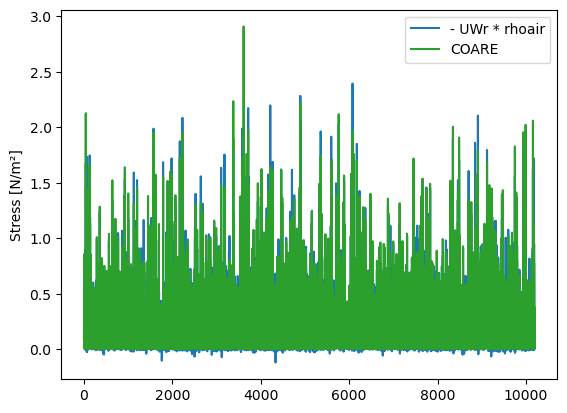

In [9]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

Text(0, 0.5, 'COARE [N/m²]')

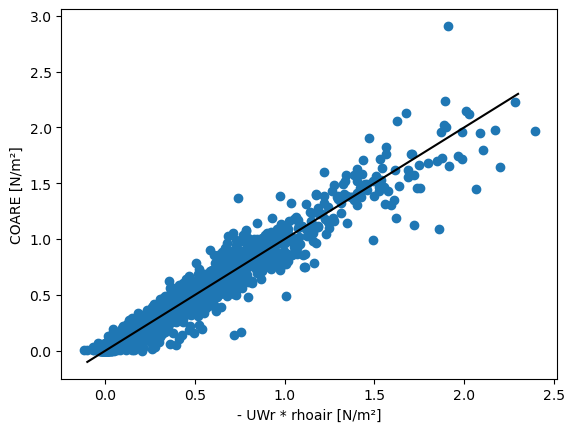

In [10]:
plt.scatter(y.values, c.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [11]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [12]:
df.shape

(10200, 65)

In [13]:
df.shape[0]*0.8

8160.0

In [344]:
split_idx = 8160

# Prepare features and labels

In [345]:
predictor_variables = [
    'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
    'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft'
]

In [346]:
x = df[predictor_variables]
x

sigma0_trip_fore  sigma0_trip_mid  sigma0_trip_aft  \
8291         -21.329966       -20.314684       -20.953699   
3812         -20.943676       -13.976841       -16.550650   
2220         -13.540611       -10.180238       -18.316372   
4495         -20.408886       -14.060665       -14.675045   
1173         -18.629818       -16.368279       -17.564482   
...                 ...              ...              ...   
7832         -27.140862       -23.478655       -28.449240   
9509         -22.741312       -14.892164       -18.181908   
2283         -22.848459       -16.476969       -19.476072   
10196        -20.899197       -14.651740       -17.077446   
8799         -33.386471       -26.202229       -28.333775   

       azi_angle_trip_fore  azi_angle_trip_mid  azi_angle_trip_aft  \
8291             53.500000           99.329994          145.099991   
3812            105.349998           60.669998           15.929999   
2220             56.160000          101.400002          146.589996   
4495             73.409996          117.959999          162.399994   
1173             54.480000          100.189995          145.770004   
...                    ...                 ...                 ...   
7832             49.070000           95.549995          141.940002   
9509             55.559998          101.309998          146.940002   
2283            -24.299999          -69.070000         -113.919998   
10196           105.129997           60.469997           15.740000   
8799            -12.940000          -57.509998         -102.110001   

       inc_angle_trip_fore  inc_angle_trip_mid  inc_angle_trip_aft  
8291             52.219997           41.040001           52.239998  
3812             51.360001           40.430000           51.329998  
2220             37.619999           28.219999           37.610001  
4495             59.059998           47.939999           58.859997  
1173             48.719997           37.790001           48.719997  
...                    ...                 ...                 ...  
7832             63.939999           52.369999           63.719997  
9509             46.489998           35.770000           46.469997  
2283             61.529999           50.469997           61.609997  
10196            52.669998           41.669998           52.629997  
8799             58.449997           47.399998           58.489998  

[10200 rows x 9 columns]

In [347]:
y = - df['UWr'] * df['rhoair']
y

8291     0.142940
3812     0.248008
2220     0.128759
4495     0.448188
1173     0.011088
           ...   
7832     0.026857
9509     0.048700
2283     0.157549
10196    0.061098
8799     0.006362
Length: 10200, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [348]:
c = df['stress']

In [349]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [350]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [351]:
c_train = c[:split_idx]
c_test = c[split_idx:]

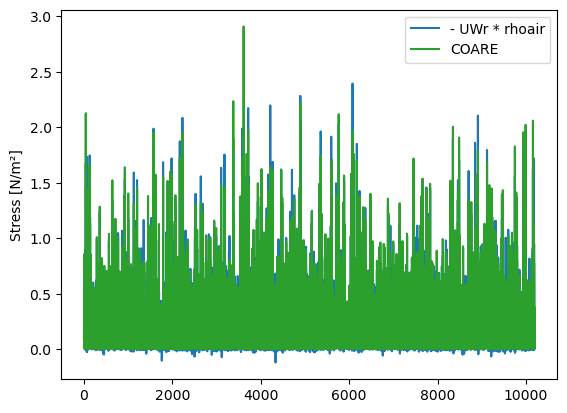

In [352]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

# ML setup

In [353]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [354]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

# First experiment - Linear regression

In [355]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 0s 1ms/step - loss: 6361.0602 - mean_absolute_error: 73.7066 - val_loss: 2354.3357 - val_mean_absolute_error: 42.7133
Epoch 2/500
179/179 [==============================] - 0s 689us/step - loss: 1811.8170 - mean_absolute_error: 36.1650 - val_loss: 687.5543 - val_mean_absolute_error: 21.9703
Epoch 3/500
179/179 [==============================] - 0s 637us/step - loss: 544.2948 - mean_absolute_error: 19.3873 - val_loss: 280.6585 - val_mean_absolute_error: 15.3381
Epoch 4/500
179/179 [==============================] - 0s 650us/step - loss: 249.5380 - mean_absolute_error: 14.6094 - val_loss: 155.7707 - val_mean_absolute_error: 12.2683
Epoch 5/500
179/179 [==============================] - 0s 629us/step - loss: 139.8948 - mean_absolute_error: 11.5692 - val_loss: 88.5833 - val_mean_absolute_error: 9.3324
Epoch 6/500
179/179 [==============================] - 0s 647us/step - loss: 84.2652 - mean_absolute_error: 8.7575 - val_loss: 46.6387 -

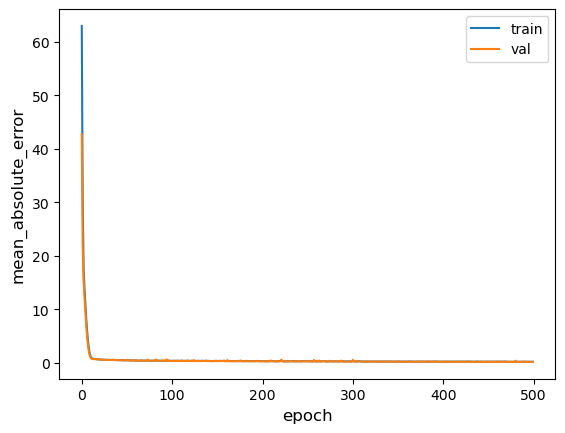

64/64 [==============================] - 0s 350us/step - loss: 0.0784 - mean_absolute_error: 0.1876
Test accuracy 0.1876070499420166
Test loss 0.07844231277704239


In [356]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [357]:
y_test_pred = multi_dense_model.predict(x_test)

In [358]:
np.mean(y_test)

0.17533387401213504

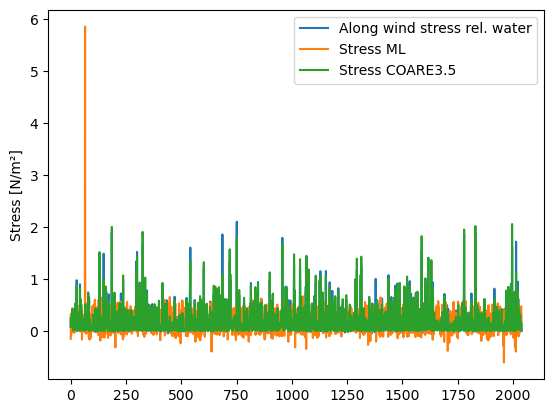

In [359]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

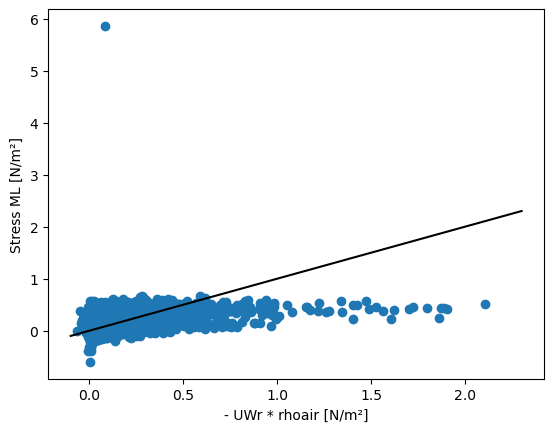

In [360]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

Text(0, 0.5, 'COARE [N/m²]')

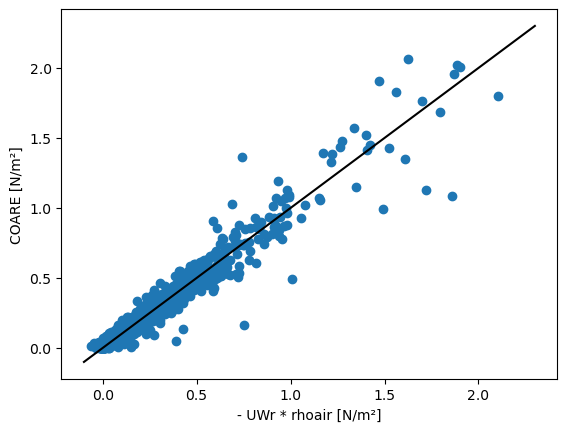

In [361]:
plt.scatter(y_test.values, c_test.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [362]:
rmse(y_test.values, y_test_pred)

0.3287569739362739

In [363]:
rmse(y_test.values, c_test)

0.056241578532168816

## Correlation

In [364]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.27757806],
       [0.27757806, 1.        ]])

In [365]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

# Other experiments

In [366]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [367]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [368]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 0.2851 - mean_absolute_error: 0.4088 - val_loss: 0.1952 - val_mean_absolute_error: 0.3405
Epoch 2/500
179/179 [==============================] - 0s 743us/step - loss: 0.1081 - mean_absolute_error: 0.2275 - val_loss: 0.0756 - val_mean_absolute_error: 0.1920
Epoch 3/500
179/179 [==============================] - 0s 735us/step - loss: 0.0866 - mean_absolute_error: 0.1915 - val_loss: 0.0582 - val_mean_absolute_error: 0.1657
Epoch 4/500
179/179 [==============================] - 0s 743us/step - loss: 0.0704 - mean_absolute_error: 0.1759 - val_loss: 0.0554 - val_mean_absolute_error: 0.1632
Epoch 5/500
179/179 [==============================] - 0s 737us/step - loss: 0.0662 - mean_absolute_error: 0.1709 - val_loss: 0.0510 - val_mean_absolute_error: 0.1529
Epoch 6/500
179/179 [==============================] - 0s 700us/step - loss: 0.0586 - mean_absolute_error: 0.1617 - val_loss: 0.0490 - val_mean_absolute_error: 0.1529


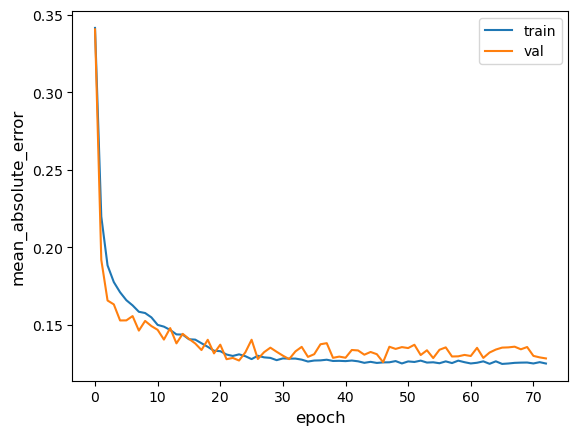

64/64 [==============================] - 0s 301us/step - loss: 0.0535 - mean_absolute_error: 0.1415
Test accuracy 0.141453355550766
Test loss 0.053544264286756516


In [369]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [370]:
y_test_pred = multi_dense_model.predict(x_test)

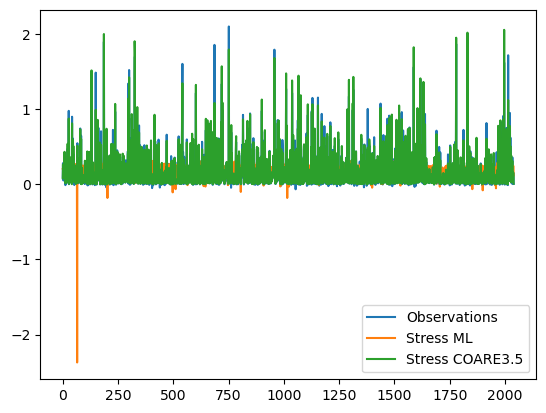

In [371]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

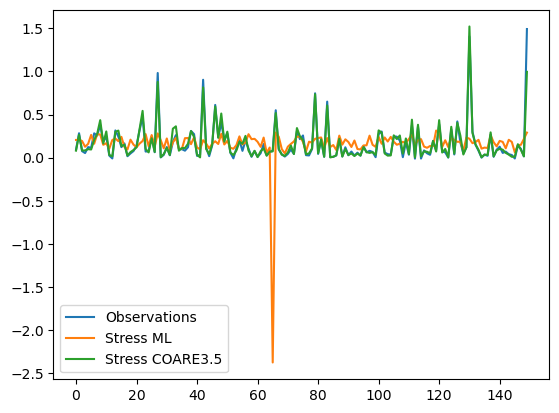

In [372]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [373]:
rmse(y_test.values, y_test_pred)

0.26055379035980913

## Correlation

In [374]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.33253618],
       [0.33253618, 1.        ]])

In [375]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [377]:
y_test.values.shape

(2040,)

In [378]:
y_test_pred[:, 0].shape

(2040,)

In [379]:
(y_test_pred > -2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [380]:
y_test.values[(y_test_pred[:, 0] > -2)]

array([0.09144661, 0.28334564, 0.07565986, ..., 0.15754948, 0.06109848,
       0.00636154])

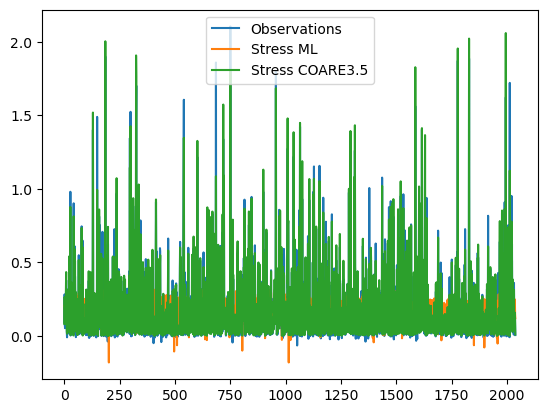

In [381]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

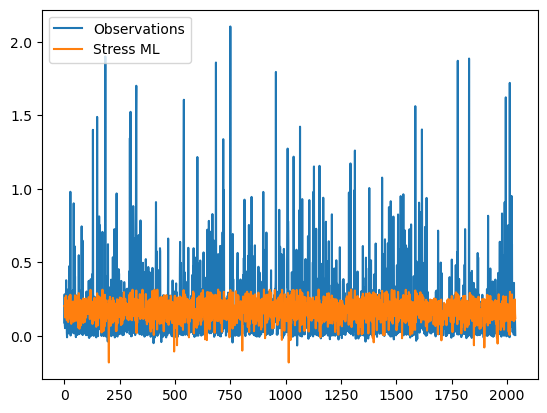

In [382]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [383]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97385686],
       [0.97385686, 1.        ]])

In [384]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.2544282934972777

Text(0, 0.5, 'Stress ML [N/m²]')

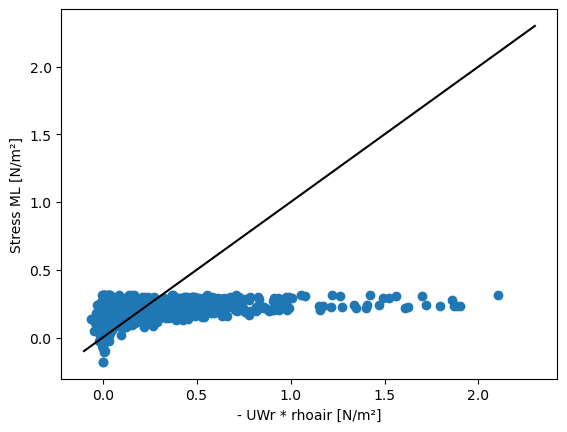

In [385]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [386]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [387]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [388]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 1.4620 - mean_absolute_error: 0.9460 - val_loss: 0.1651 - val_mean_absolute_error: 0.2943
Epoch 2/500
179/179 [==============================] - 0s 805us/step - loss: 0.5785 - mean_absolute_error: 0.5675 - val_loss: 0.0932 - val_mean_absolute_error: 0.2278
Epoch 3/500
179/179 [==============================] - 0s 797us/step - loss: 0.4206 - mean_absolute_error: 0.4633 - val_loss: 0.0817 - val_mean_absolute_error: 0.2125
Epoch 4/500
179/179 [==============================] - 0s 724us/step - loss: 0.3388 - mean_absolute_error: 0.4166 - val_loss: 0.0661 - val_mean_absolute_error: 0.1861
Epoch 5/500
179/179 [==============================] - 0s 747us/step - loss: 0.2308 - mean_absolute_error: 0.3541 - val_loss: 0.0654 - val_mean_absolute_error: 0.1827
Epoch 6/500
179/179 [==============================] - 0s 754us/step - loss: 0.1696 - mean_absolute_error: 0.2968 - val_loss: 0.0571 - val_mean_absolute_error: 0.1646


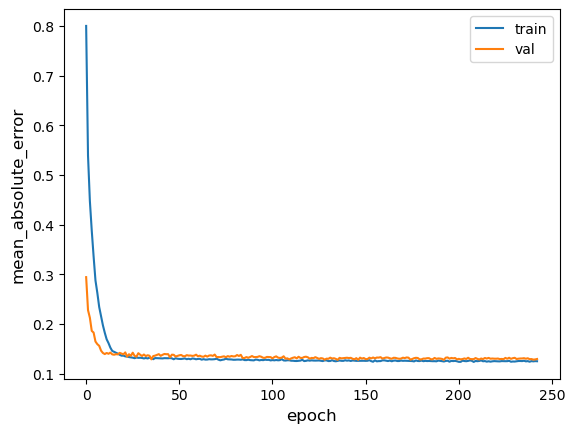

64/64 [==============================] - 0s 362us/step - loss: 0.0528 - mean_absolute_error: 0.1409
Test accuracy 0.14088892936706543
Test loss 0.05284641683101654


In [389]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [390]:
y_test_pred = multi_dense_model.predict(x_test)

In [391]:
rmse(y_test.values, y_test_pred)

0.258617941111498

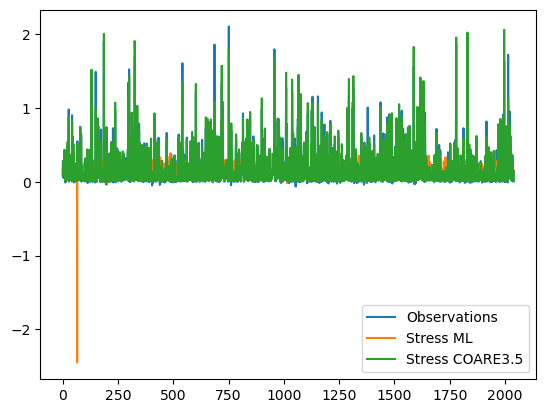

In [392]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

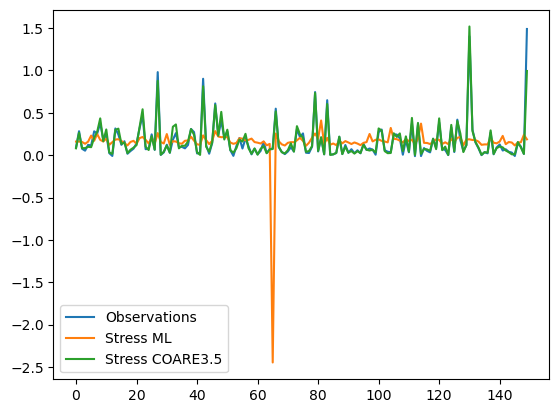

In [393]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [394]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.34882671],
       [0.34882671, 1.        ]])

In [395]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

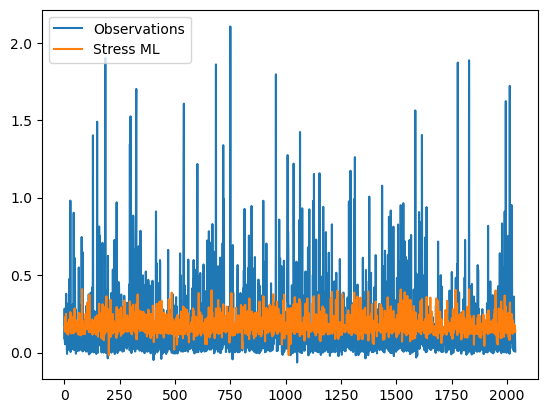

In [396]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [397]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], c_test.values[y_test_pred[:, 0] > -0.5])

array([[1.        , 0.97385686],
       [0.97385686, 1.        ]])

In [398]:
rmse(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])

0.2520687515203724

Text(0, 0.5, 'Stress ML [N/m²]')

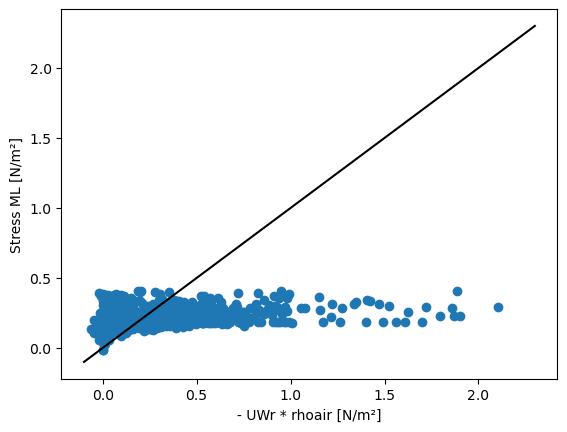

In [399]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [56]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [57]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [58]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
56/56 [==============================] - 0s 3ms/step - loss: 5.3519 - mean_absolute_error: 1.9291 - val_loss: 5.3840 - val_mean_absolute_error: 2.0477
Epoch 2/500
56/56 [==============================] - 0s 1ms/step - loss: 2.9013 - mean_absolute_error: 1.3428 - val_loss: 1.9169 - val_mean_absolute_error: 1.2916
Epoch 3/500
56/56 [==============================] - 0s 1ms/step - loss: 1.4939 - mean_absolute_error: 1.0302 - val_loss: 1.0012 - val_mean_absolute_error: 0.9347
Epoch 4/500
56/56 [==============================] - 0s 1ms/step - loss: 1.1085 - mean_absolute_error: 0.8900 - val_loss: 0.6165 - val_mean_absolute_error: 0.7280
Epoch 5/500
56/56 [==============================] - 0s 1ms/step - loss: 0.8718 - mean_absolute_error: 0.8052 - val_loss: 0.4139 - val_mean_absolute_error: 0.5926
Epoch 6/500
56/56 [==============================] - 0s 1ms/step - loss: 0.6962 - mean_absolute_error: 0.7064 - val_loss: 0.2992 - val_mean_absolute_error: 0.4928
Epoch 7/500
56/56 [===

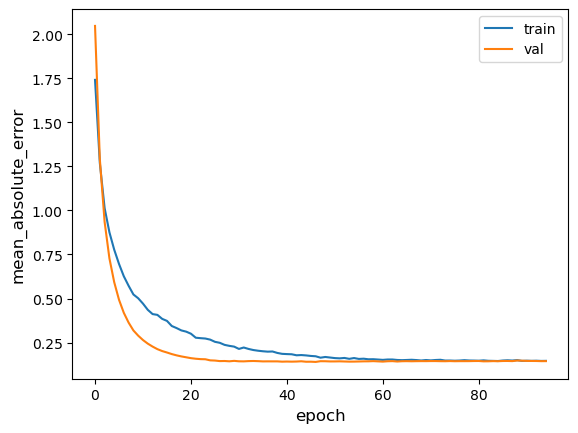

240/240 [==============================] - 0s 375us/step - loss: 0.0548 - mean_absolute_error: 0.1471
Test accuracy 0.1471172720193863
Test loss 0.054786566644907


In [59]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [60]:
y_test_pred = multi_dense_model.predict(x_test)

In [61]:
rmse(y_test.values, y_test_pred)

0.24436480816489065

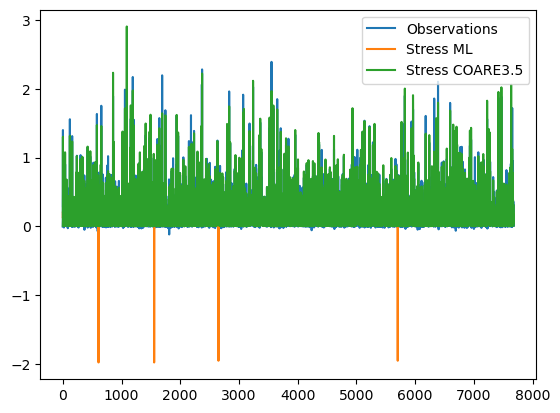

In [62]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

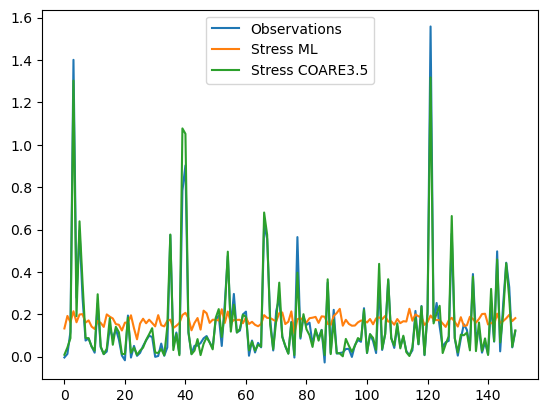

In [63]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

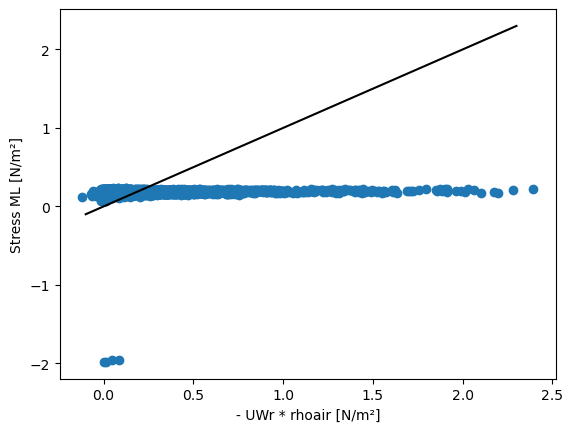

In [64]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [65]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.19129423],
       [0.19129423, 1.        ]])

In [66]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97662186],
       [0.97662186, 1.        ]])

In [67]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [68]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [69]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
111/111 [==============================] - 1s 2ms/step - loss: 0.9472 - mean_absolute_error: 0.7833 - val_loss: 0.6863 - val_mean_absolute_error: 0.7542
Epoch 2/500
111/111 [==============================] - 0s 914us/step - loss: 0.5537 - mean_absolute_error: 0.5888 - val_loss: 0.1052 - val_mean_absolute_error: 0.2455
Epoch 3/500
111/111 [==============================] - 0s 873us/step - loss: 0.4147 - mean_absolute_error: 0.4869 - val_loss: 0.0611 - val_mean_absolute_error: 0.1703
Epoch 4/500
111/111 [==============================] - 0s 855us/step - loss: 0.3047 - mean_absolute_error: 0.4316 - val_loss: 0.0527 - val_mean_absolute_error: 0.1494
Epoch 5/500
111/111 [==============================] - 0s 873us/step - loss: 0.2422 - mean_absolute_error: 0.3785 - val_loss: 0.0517 - val_mean_absolute_error: 0.1451
Epoch 6/500
111/111 [==============================] - 0s 881us/step - loss: 0.2070 - mean_absolute_error: 0.3412 - val_loss: 0.0489 - val_mean_absolute_error: 0.1379


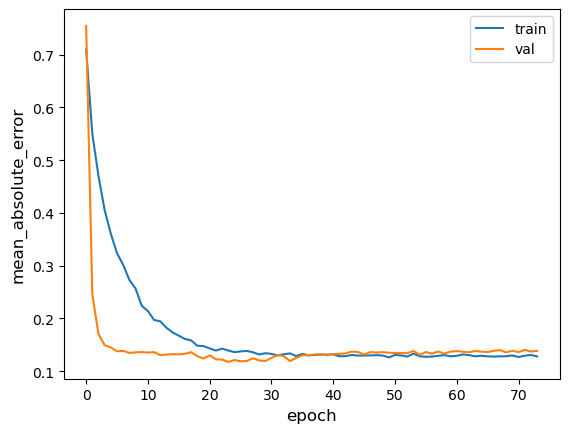

240/240 [==============================] - 0s 349us/step - loss: 0.0745 - mean_absolute_error: 0.1439
Test accuracy 0.14392399787902832
Test loss 0.07454687356948853


In [70]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [71]:
y_test_pred = multi_dense_model.predict(x_test)

In [72]:
rmse(y_test.values, y_test_pred)

0.2882105029053405

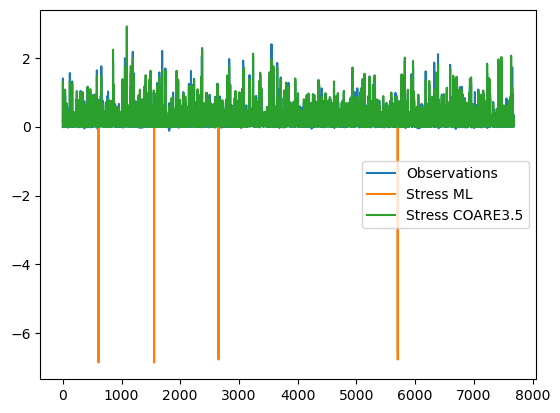

In [73]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

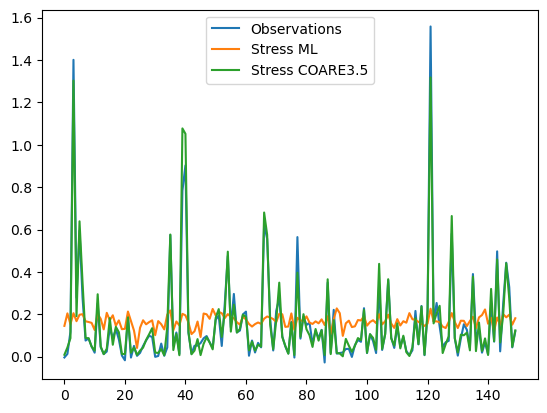

In [74]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

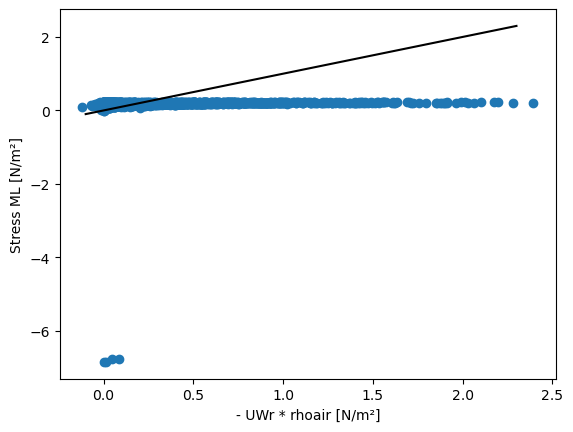

In [75]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [76]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.1103319],
       [0.1103319, 1.       ]])

In [77]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97662186],
       [0.97662186, 1.        ]])

In [78]:
OUT_STEPS = 1
num_features = 1
batch_size =64
epochs=500

metric = 'mean_absolute_error'

In [79]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [80]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
28/28 [==============================] - 0s 5ms/step - loss: 1.6255 - mean_absolute_error: 1.0442 - val_loss: 16.9467 - val_mean_absolute_error: 3.9136
Epoch 2/500
28/28 [==============================] - 0s 2ms/step - loss: 0.9423 - mean_absolute_error: 0.7962 - val_loss: 2.6758 - val_mean_absolute_error: 1.4583
Epoch 3/500
28/28 [==============================] - 0s 2ms/step - loss: 0.7728 - mean_absolute_error: 0.7033 - val_loss: 0.6179 - val_mean_absolute_error: 0.6432
Epoch 4/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6284 - mean_absolute_error: 0.6249 - val_loss: 0.2260 - val_mean_absolute_error: 0.3718
Epoch 5/500
28/28 [==============================] - 0s 1ms/step - loss: 0.5889 - mean_absolute_error: 0.6131 - val_loss: 0.1390 - val_mean_absolute_error: 0.2840
Epoch 6/500
28/28 [==============================] - 0s 1ms/step - loss: 0.5336 - mean_absolute_error: 0.5764 - val_loss: 0.1160 - val_mean_absolute_error: 0.2594
Epoch 7/500
28/28 [==

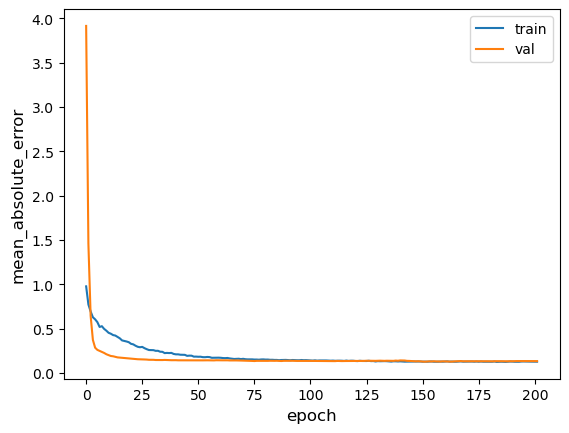

240/240 [==============================] - 0s 378us/step - loss: 0.0788 - mean_absolute_error: 0.1388
Test accuracy 0.13876837491989136
Test loss 0.07881491631269455


In [81]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [82]:
y_test_pred = multi_dense_model.predict(x_test)

In [83]:
rmse(y_test.values, y_test_pred)

0.30284837846465157

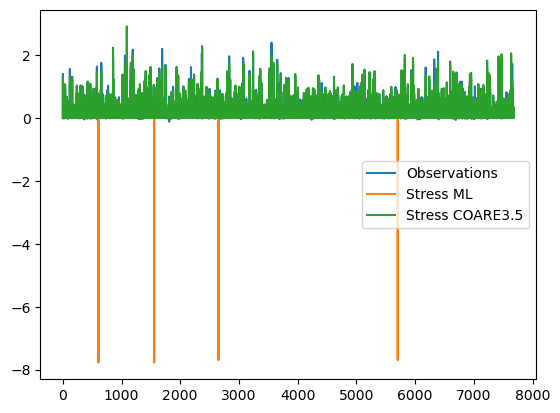

In [84]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

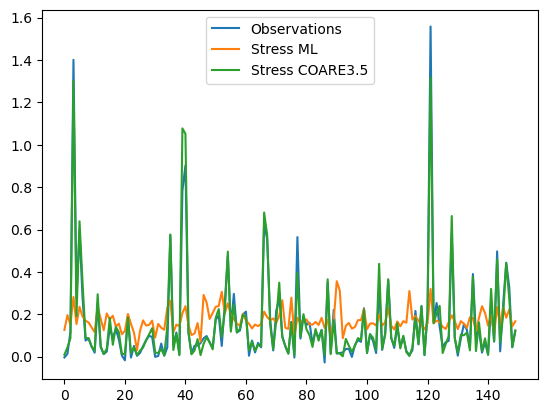

In [85]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

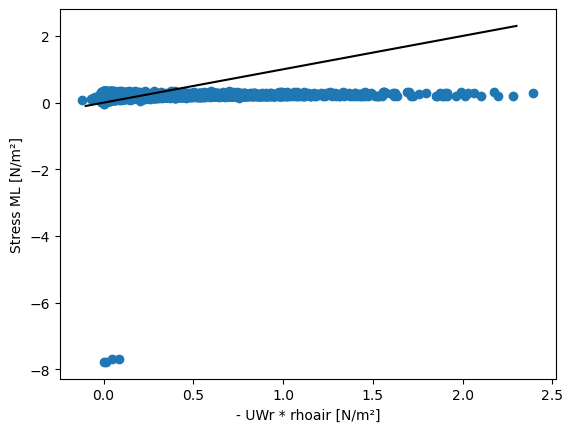

In [86]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [87]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.1448894],
       [0.1448894, 1.       ]])

In [88]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97662186],
       [0.97662186, 1.        ]])

In [89]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [90]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [91]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
56/56 [==============================] - 0s 3ms/step - loss: 1.2755 - mean_absolute_error: 0.9016 - val_loss: 1.9263 - val_mean_absolute_error: 1.2123
Epoch 2/500
56/56 [==============================] - 0s 1ms/step - loss: 0.8506 - mean_absolute_error: 0.7134 - val_loss: 0.2747 - val_mean_absolute_error: 0.4234
Epoch 3/500
56/56 [==============================] - 0s 1ms/step - loss: 0.6353 - mean_absolute_error: 0.6254 - val_loss: 0.1183 - val_mean_absolute_error: 0.2647
Epoch 4/500
56/56 [==============================] - 0s 1ms/step - loss: 0.4610 - mean_absolute_error: 0.5335 - val_loss: 0.0980 - val_mean_absolute_error: 0.2500
Epoch 5/500
56/56 [==============================] - 0s 1ms/step - loss: 0.4047 - mean_absolute_error: 0.4993 - val_loss: 0.0853 - val_mean_absolute_error: 0.2323
Epoch 6/500
56/56 [==============================] - 0s 1ms/step - loss: 0.3208 - mean_absolute_error: 0.4424 - val_loss: 0.0657 - val_mean_absolute_error: 0.1983
Epoch 7/500
56/56 [===

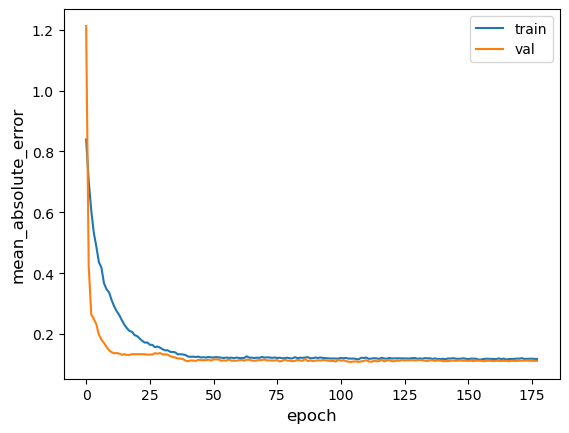

240/240 [==============================] - 0s 375us/step - loss: 0.2117 - mean_absolute_error: 0.1243
Test accuracy 0.12425575405359268
Test loss 0.2117384523153305


In [92]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [93]:
y_test_pred = multi_dense_model.predict(x_test)

In [94]:
rmse(y_test.values, y_test_pred)

0.4909896717070727

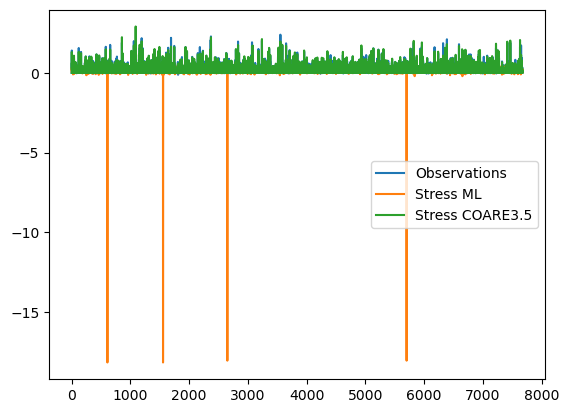

In [95]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

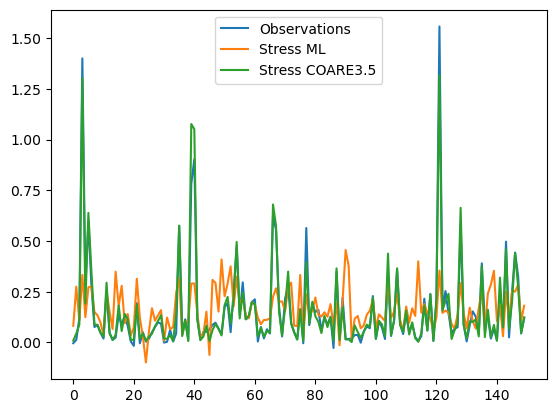

In [96]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

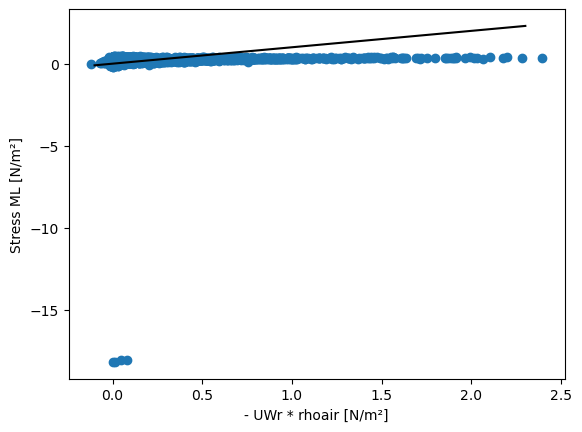

In [97]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [98]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.14343188],
       [0.14343188, 1.        ]])

In [99]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97662186],
       [0.97662186, 1.        ]])

In [100]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [101]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [102]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
56/56 [==============================] - 1s 4ms/step - loss: 2.6300 - mean_absolute_error: 1.2876 - val_loss: 1.3399 - val_mean_absolute_error: 0.8910
Epoch 2/500
56/56 [==============================] - 0s 2ms/step - loss: 1.6377 - mean_absolute_error: 0.9633 - val_loss: 0.4970 - val_mean_absolute_error: 0.4895
Epoch 3/500
56/56 [==============================] - 0s 1ms/step - loss: 1.2117 - mean_absolute_error: 0.8170 - val_loss: 0.3390 - val_mean_absolute_error: 0.3834
Epoch 4/500
56/56 [==============================] - 0s 1ms/step - loss: 0.8405 - mean_absolute_error: 0.6539 - val_loss: 0.2096 - val_mean_absolute_error: 0.3100
Epoch 5/500
56/56 [==============================] - 0s 1ms/step - loss: 0.5952 - mean_absolute_error: 0.5451 - val_loss: 0.1730 - val_mean_absolute_error: 0.2844
Epoch 6/500
56/56 [==============================] - 0s 1ms/step - loss: 0.4178 - mean_absolute_error: 0.4520 - val_loss: 0.1340 - val_mean_absolute_error: 0.2426
Epoch 7/500
56/56 [===

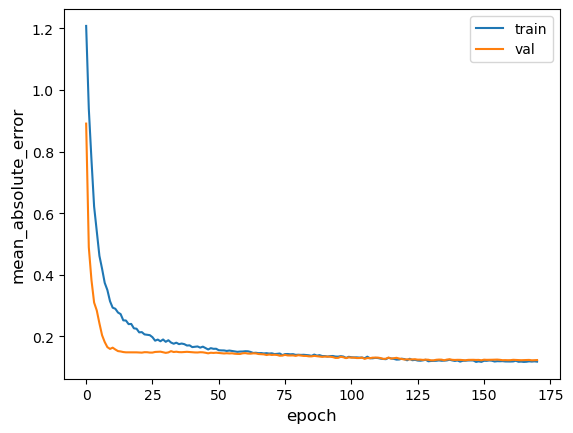

240/240 [==============================] - 0s 391us/step - loss: 0.0509 - mean_absolute_error: 0.1268
Test accuracy 0.1267646998167038
Test loss 0.050923943519592285


In [103]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [104]:
y_test_pred = multi_dense_model.predict(x_test)

In [105]:
rmse(y_test.values, y_test_pred)

0.2481917973538859

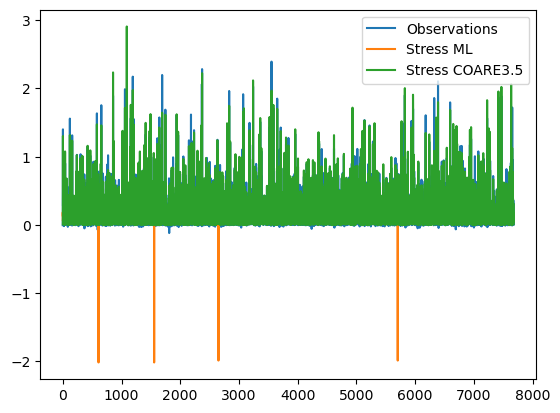

In [106]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

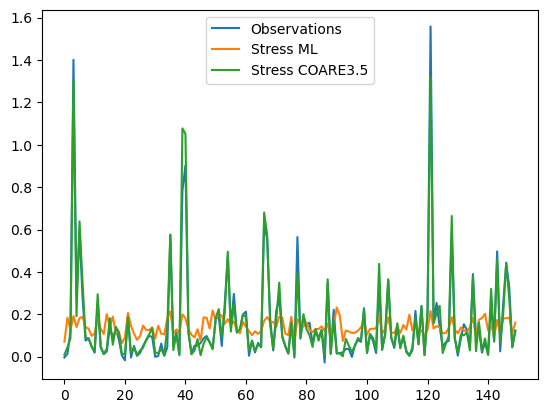

In [107]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

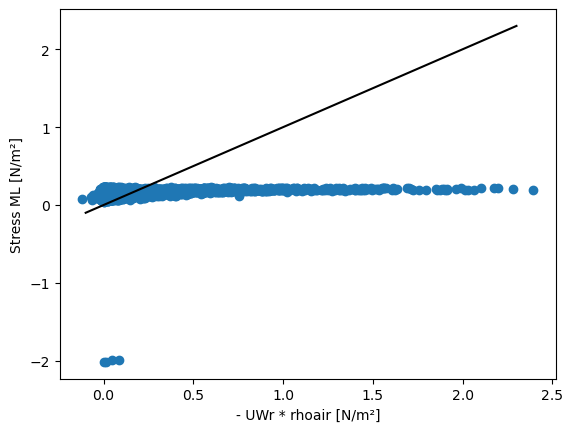

In [108]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [109]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.35900174],
       [0.35900174, 1.        ]])

In [110]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97662186],
       [0.97662186, 1.        ]])

In [111]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [112]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [113]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
56/56 [==============================] - 0s 3ms/step - loss: 3.4859 - mean_absolute_error: 1.4400 - val_loss: 2.0393 - val_mean_absolute_error: 0.9571
Epoch 2/500
56/56 [==============================] - 0s 1ms/step - loss: 1.4194 - mean_absolute_error: 0.9022 - val_loss: 1.5774 - val_mean_absolute_error: 0.8685
Epoch 3/500
56/56 [==============================] - 0s 1ms/step - loss: 1.0419 - mean_absolute_error: 0.7011 - val_loss: 0.9524 - val_mean_absolute_error: 0.7509
Epoch 4/500
56/56 [==============================] - 0s 1ms/step - loss: 0.8506 - mean_absolute_error: 0.6504 - val_loss: 0.6575 - val_mean_absolute_error: 0.6618
Epoch 5/500
56/56 [==============================] - 0s 1ms/step - loss: 0.7844 - mean_absolute_error: 0.6295 - val_loss: 0.5105 - val_mean_absolute_error: 0.6078
Epoch 6/500
56/56 [==============================] - 0s 1ms/step - loss: 0.7072 - mean_absolute_error: 0.6038 - val_loss: 0.4134 - val_mean_absolute_error: 0.5544
Epoch 7/500
56/56 [===

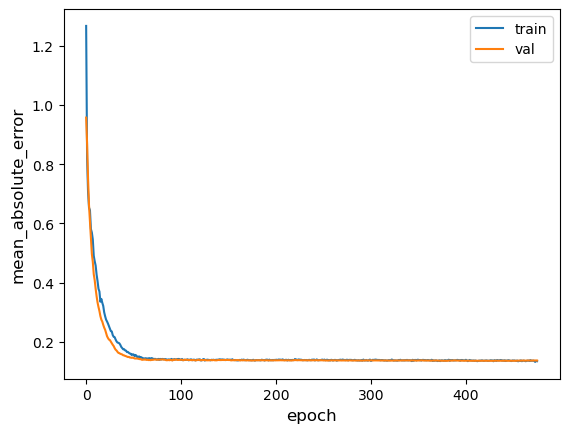

240/240 [==============================] - 0s 369us/step - loss: 0.0510 - mean_absolute_error: 0.1421
Test accuracy 0.14207489788532257
Test loss 0.05095786228775978


In [114]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [115]:
y_test_pred = multi_dense_model.predict(x_test)

In [116]:
rmse(y_test.values, y_test_pred)

0.24688191534608012

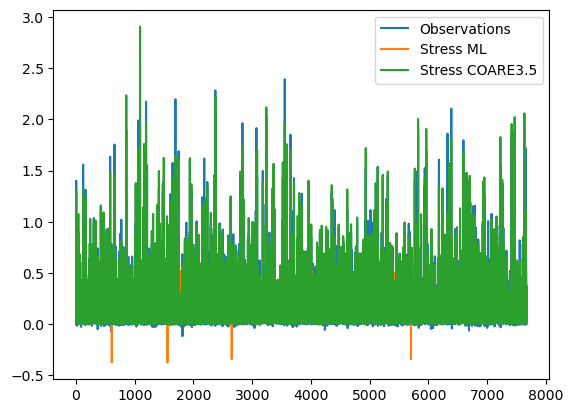

In [117]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

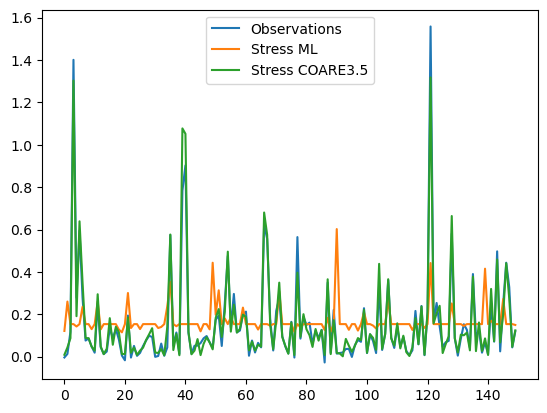

In [118]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

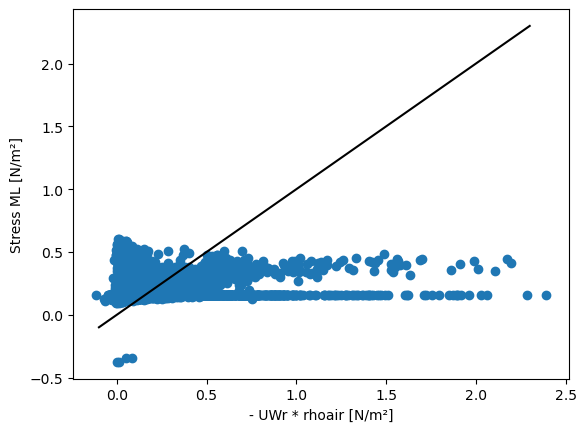

In [119]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [120]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.32474665],
       [0.32474665, 1.        ]])

In [121]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97662186],
       [0.97662186, 1.        ]])

In [122]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [123]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [124]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
56/56 [==============================] - 0s 3ms/step - loss: 2.6519 - mean_absolute_error: 1.3025 - val_loss: 2.3075 - val_mean_absolute_error: 1.3062
Epoch 2/500
56/56 [==============================] - 0s 1ms/step - loss: 1.5026 - mean_absolute_error: 0.9306 - val_loss: 0.9443 - val_mean_absolute_error: 0.8176
Epoch 3/500
56/56 [==============================] - 0s 1ms/step - loss: 1.1278 - mean_absolute_error: 0.8288 - val_loss: 0.5425 - val_mean_absolute_error: 0.5702
Epoch 4/500
56/56 [==============================] - 0s 1ms/step - loss: 0.9978 - mean_absolute_error: 0.7673 - val_loss: 0.3630 - val_mean_absolute_error: 0.4500
Epoch 5/500
56/56 [==============================] - 0s 1ms/step - loss: 0.8483 - mean_absolute_error: 0.7250 - val_loss: 0.2721 - val_mean_absolute_error: 0.3726
Epoch 6/500
56/56 [==============================] - 0s 1ms/step - loss: 0.6536 - mean_absolute_error: 0.6305 - val_loss: 0.2034 - val_mean_absolute_error: 0.3135
Epoch 7/500
56/56 [===

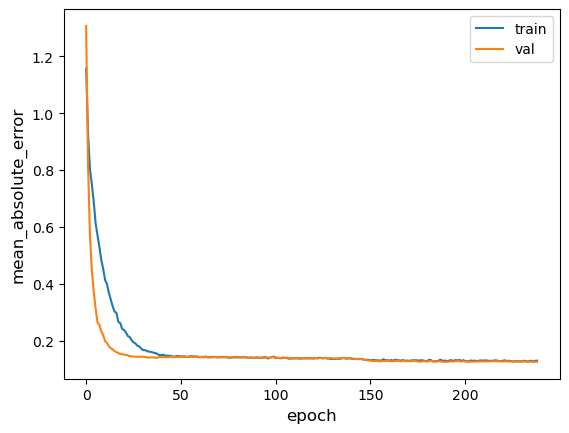

240/240 [==============================] - 0s 362us/step - loss: 0.0474 - mean_absolute_error: 0.1314
Test accuracy 0.13140496611595154
Test loss 0.0474427305161953


In [125]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [126]:
y_test_pred = multi_dense_model.predict(x_test)

In [127]:
rmse(y_test.values, y_test_pred)

0.25302927575119893

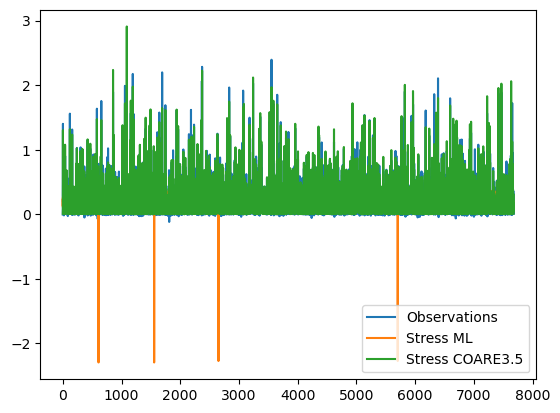

In [128]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

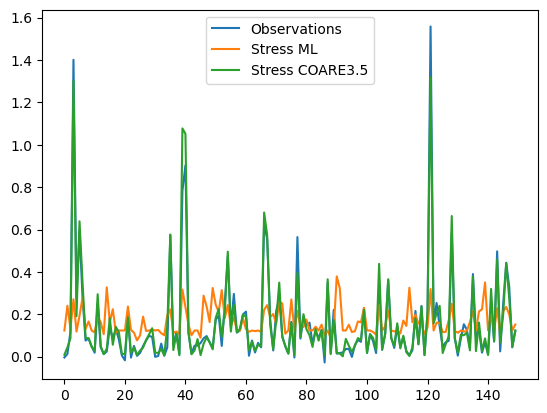

In [129]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

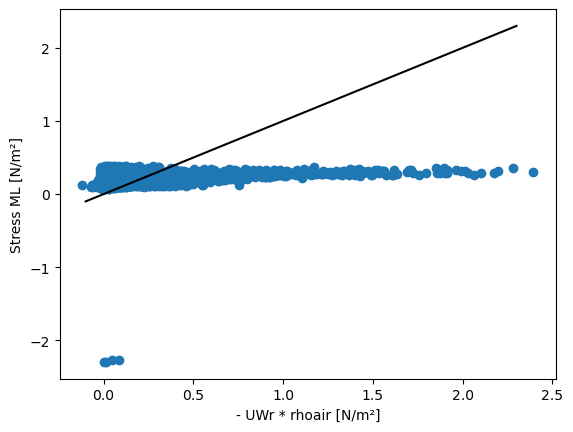

In [130]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [131]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.40913567],
       [0.40913567, 1.        ]])

In [132]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97662186],
       [0.97662186, 1.        ]])

In [133]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [134]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [135]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.6),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
56/56 [==============================] - 0s 3ms/step - loss: 7.1781 - mean_absolute_error: 1.9880 - val_loss: 6.4439 - val_mean_absolute_error: 2.0121
Epoch 2/500
56/56 [==============================] - 0s 1ms/step - loss: 4.5420 - mean_absolute_error: 1.6054 - val_loss: 2.0546 - val_mean_absolute_error: 1.0095
Epoch 3/500
56/56 [==============================] - 0s 1ms/step - loss: 2.9129 - mean_absolute_error: 1.2714 - val_loss: 1.0501 - val_mean_absolute_error: 0.6754
Epoch 4/500
56/56 [==============================] - 0s 1ms/step - loss: 2.5106 - mean_absolute_error: 1.1620 - val_loss: 0.6851 - val_mean_absolute_error: 0.5772
Epoch 5/500
56/56 [==============================] - 0s 1ms/step - loss: 2.1173 - mean_absolute_error: 1.0898 - val_loss: 0.5008 - val_mean_absolute_error: 0.5213
Epoch 6/500
56/56 [==============================] - 0s 1ms/step - loss: 1.5483 - mean_absolute_error: 0.9028 - val_loss: 0.4016 - val_mean_absolute_error: 0.4807
Epoch 7/500
56/56 [===

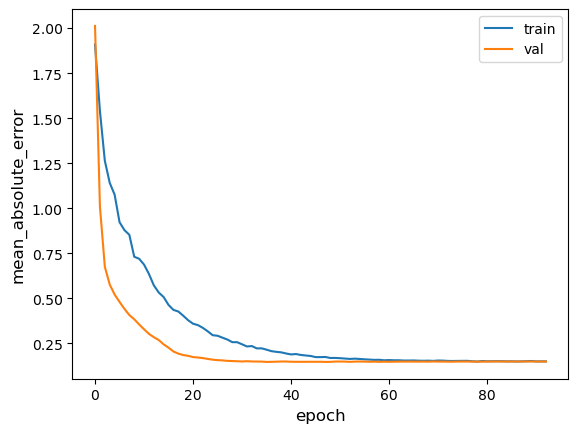

240/240 [==============================] - 0s 356us/step - loss: 0.0582 - mean_absolute_error: 0.1527
Test accuracy 0.15274180471897125
Test loss 0.058180201798677444


In [136]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [137]:
y_test_pred = multi_dense_model.predict(x_test)

In [138]:
rmse(y_test.values, y_test_pred)

0.24567357470407297

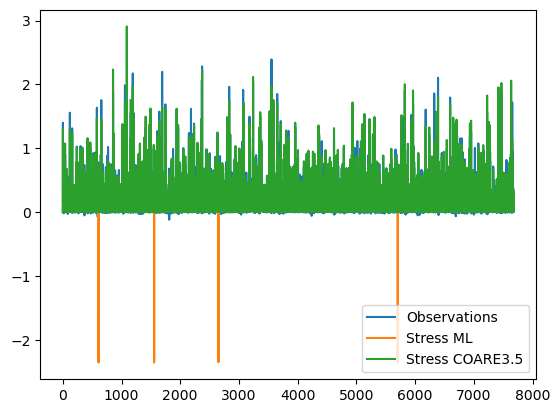

In [139]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

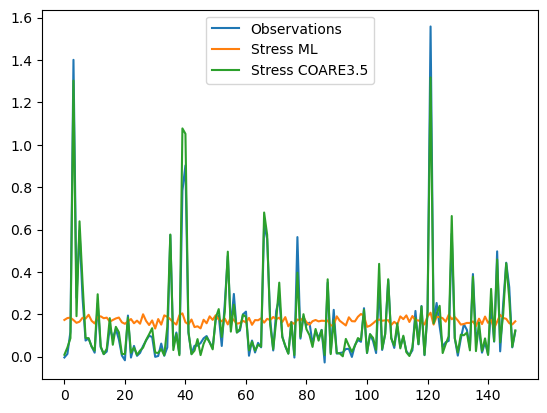

In [140]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

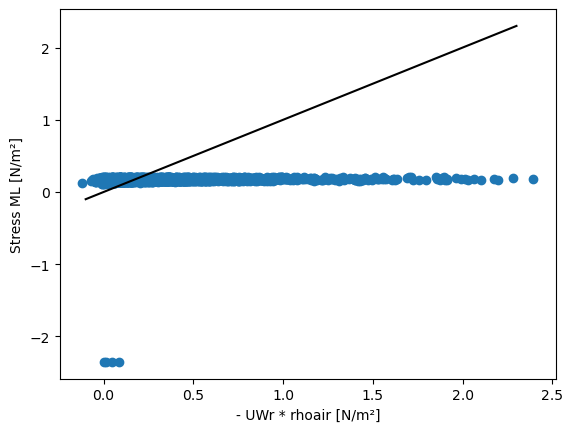

In [141]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [142]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.07645427],
       [0.07645427, 1.        ]])

In [143]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97662186],
       [0.97662186, 1.        ]])

In [144]:
OUT_STEPS = 1
num_features = 1
batch_size =128
epochs=500

metric = 'mean_absolute_error'

In [145]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [146]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
14/14 [==============================] - 0s 8ms/step - loss: 4.7028 - mean_absolute_error: 1.7415 - val_loss: 24.7470 - val_mean_absolute_error: 4.2222
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 3.9075 - mean_absolute_error: 1.6030 - val_loss: 10.3559 - val_mean_absolute_error: 2.6735
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 3.2856 - mean_absolute_error: 1.4864 - val_loss: 5.8048 - val_mean_absolute_error: 2.0607
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 2.6948 - mean_absolute_error: 1.3541 - val_loss: 3.6613 - val_mean_absolute_error: 1.7322
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 2.3625 - mean_absolute_error: 1.2734 - val_loss: 2.5002 - val_mean_absolute_error: 1.4965
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 1.9528 - mean_absolute_error: 1.1887 - val_loss: 1.8416 - val_mean_absolute_error: 1.3112
Epoch 7/500
14/14 [=

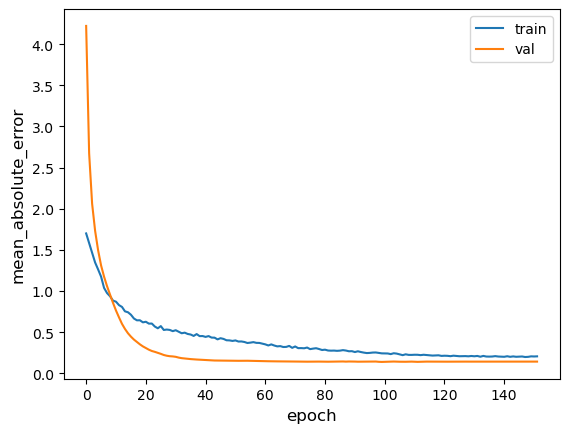

240/240 [==============================] - 0s 365us/step - loss: 0.0549 - mean_absolute_error: 0.1460
Test accuracy 0.14600194990634918
Test loss 0.05493343248963356


In [147]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [148]:
y_test_pred = multi_dense_model.predict(x_test)

In [149]:
rmse(y_test.values, y_test_pred)

0.24899812943641633

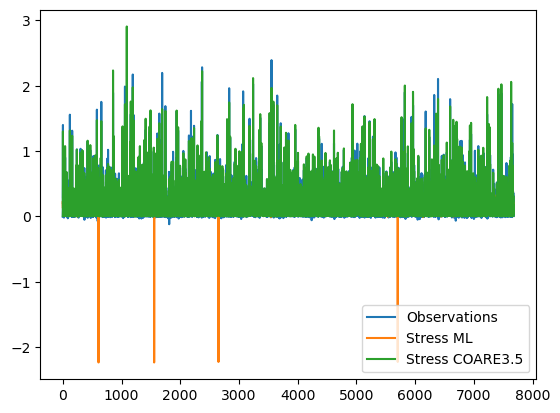

In [150]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

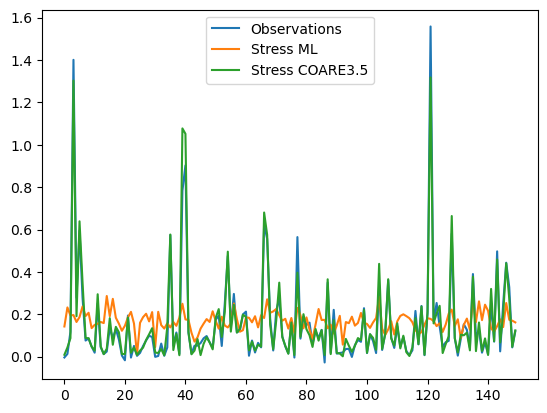

In [151]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

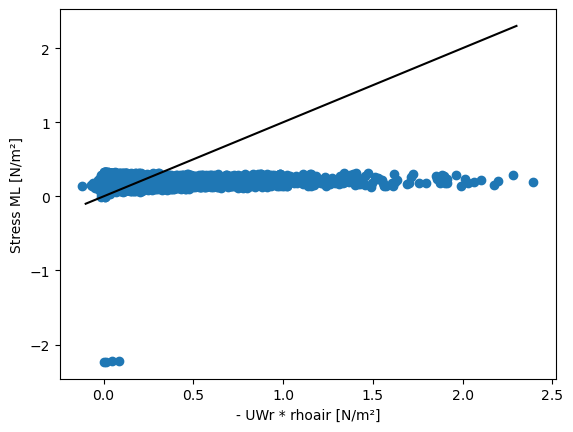

In [152]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [153]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.20579981],
       [0.20579981, 1.        ]])

In [154]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97662186],
       [0.97662186, 1.        ]])

In [221]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [222]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [223]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(126, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
56/56 [==============================] - 0s 3ms/step - loss: 1.0358 - mean_absolute_error: 0.7687 - val_loss: 0.1600 - val_mean_absolute_error: 0.3253
Epoch 2/500
56/56 [==============================] - 0s 1ms/step - loss: 0.4996 - mean_absolute_error: 0.5428 - val_loss: 0.1929 - val_mean_absolute_error: 0.3316
Epoch 3/500
56/56 [==============================] - 0s 1ms/step - loss: 0.4193 - mean_absolute_error: 0.5081 - val_loss: 0.1026 - val_mean_absolute_error: 0.2393
Epoch 4/500
56/56 [==============================] - 0s 1ms/step - loss: 0.3502 - mean_absolute_error: 0.4675 - val_loss: 0.0660 - val_mean_absolute_error: 0.1895
Epoch 5/500
56/56 [==============================] - 0s 1ms/step - loss: 0.2955 - mean_absolute_error: 0.4191 - val_loss: 0.0647 - val_mean_absolute_error: 0.1764
Epoch 6/500
56/56 [==============================] - 0s 1ms/step - loss: 0.2629 - mean_absolute_error: 0.3879 - val_loss: 0.0628 - val_mean_absolute_error: 0.1747
Epoch 7/500
56/56 [===

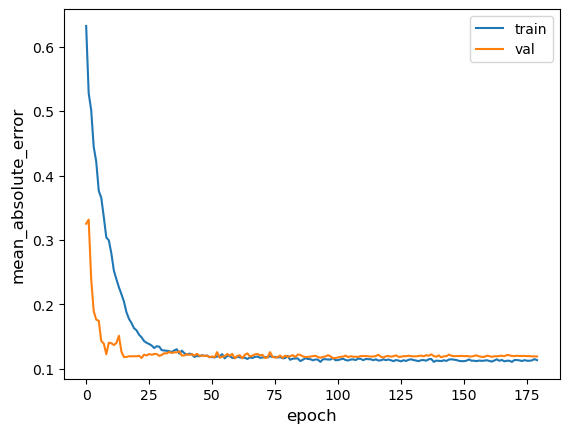

240/240 [==============================] - 0s 374us/step - loss: 789.3675 - mean_absolute_error: 0.7655
Test accuracy 0.7655174136161804
Test loss 789.3674926757812


In [224]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [225]:
y_test_pred = multi_dense_model.predict(x_test)

In [226]:
rmse(y_test.values, y_test_pred)

28.092978213450216

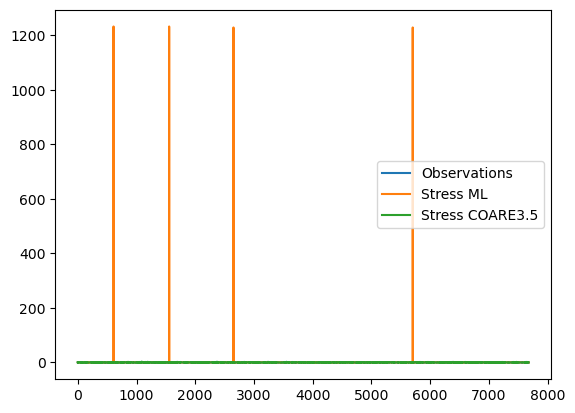

In [227]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

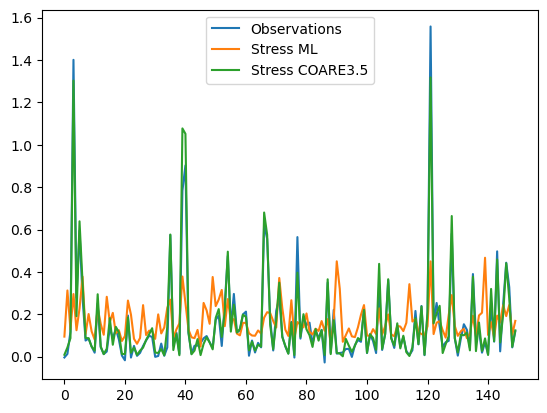

In [228]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [229]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[ 1.        , -0.01138891],
       [-0.01138891,  1.        ]])

In [230]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97662186],
       [0.97662186, 1.        ]])

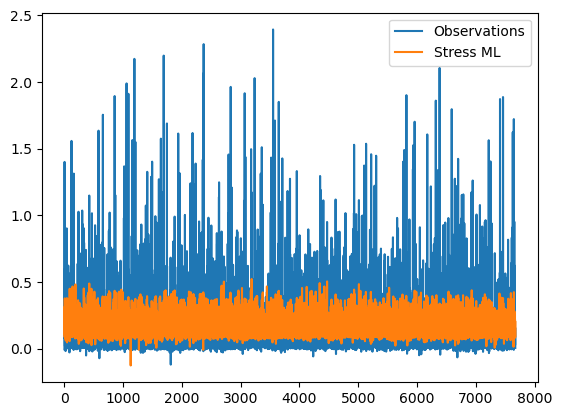

In [236]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [237]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2], c_test.values[y_test_pred[:, 0] < 2])

array([[1.        , 0.97661787],
       [0.97661787, 1.        ]])

In [238]:
rmse(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])

0.25171999205199375

Text(0, 0.5, 'Stress ML [N/m²]')

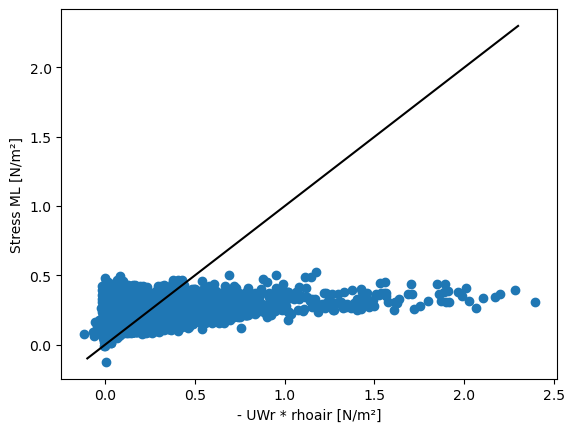

In [239]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [240]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [241]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [242]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
56/56 [==============================] - 1s 6ms/step - loss: 8.7180 - mean_absolute_error: 1.7783 - val_loss: 0.4541 - val_mean_absolute_error: 0.5269
Epoch 2/500
56/56 [==============================] - 0s 4ms/step - loss: 0.5553 - mean_absolute_error: 0.5493 - val_loss: 0.1070 - val_mean_absolute_error: 0.2536
Epoch 3/500
56/56 [==============================] - 0s 4ms/step - loss: 0.6632 - mean_absolute_error: 0.5759 - val_loss: 0.2319 - val_mean_absolute_error: 0.4187
Epoch 4/500
56/56 [==============================] - 0s 4ms/step - loss: 0.4629 - mean_absolute_error: 0.5153 - val_loss: 0.1360 - val_mean_absolute_error: 0.2688
Epoch 5/500
56/56 [==============================] - 0s 4ms/step - loss: 0.4340 - mean_absolute_error: 0.5013 - val_loss: 0.1857 - val_mean_absolute_error: 0.3346
Epoch 6/500
56/56 [==============================] - 0s 5ms/step - loss: 0.3947 - mean_absolute_error: 0.4893 - val_loss: 0.1983 - val_mean_absolute_error: 0.3295
Epoch 7/500
56/56 [===

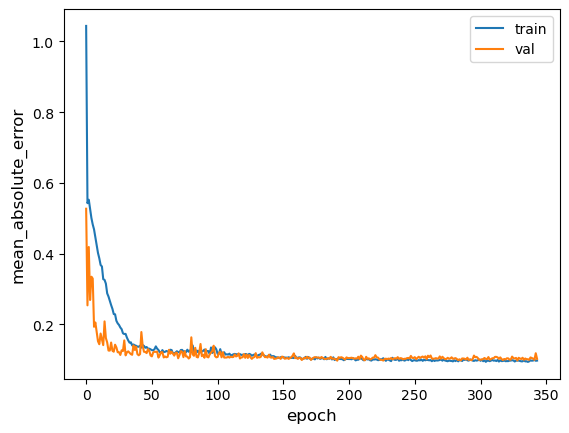

240/240 [==============================] - 0s 675us/step - loss: 8.8742 - mean_absolute_error: 0.1736
Test accuracy 0.17360404133796692
Test loss 8.874218940734863


In [243]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [244]:
y_test_pred = multi_dense_model.predict(x_test)

In [245]:
rmse(y_test.values, y_test_pred)

2.98143731822266

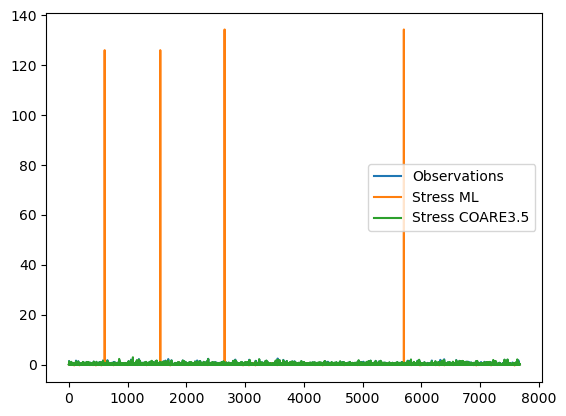

In [246]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

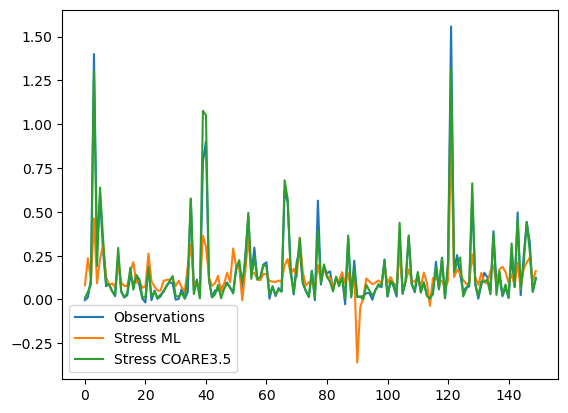

In [247]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [248]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.01041112],
       [0.01041112, 1.        ]])

In [249]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97662186],
       [0.97662186, 1.        ]])

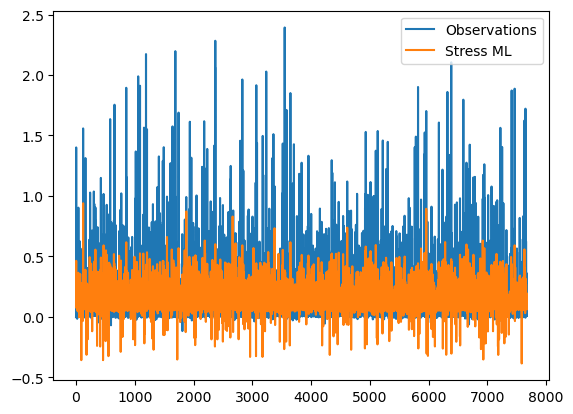

In [250]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [251]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2], c_test.values[y_test_pred[:, 0] < 2])

array([[1.        , 0.97661787],
       [0.97661787, 1.        ]])

In [252]:
rmse(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])

0.26041033888405496

Text(0, 0.5, 'Stress ML [N/m²]')

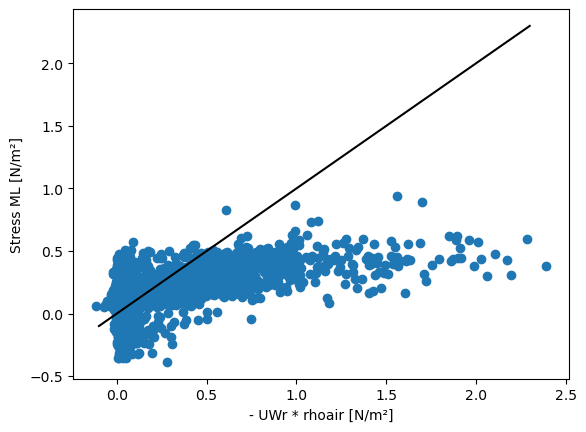

In [253]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [254]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [255]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [256]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
56/56 [==============================] - 1s 15ms/step - loss: 5.6717 - mean_absolute_error: 1.3678 - val_loss: 0.9870 - val_mean_absolute_error: 0.7822
Epoch 2/500
56/56 [==============================] - 1s 13ms/step - loss: 0.6453 - mean_absolute_error: 0.6311 - val_loss: 0.6669 - val_mean_absolute_error: 0.7035
Epoch 3/500
56/56 [==============================] - 1s 14ms/step - loss: 0.5937 - mean_absolute_error: 0.5998 - val_loss: 0.1195 - val_mean_absolute_error: 0.2475
Epoch 4/500
56/56 [==============================] - 1s 13ms/step - loss: 0.4716 - mean_absolute_error: 0.5302 - val_loss: 0.0901 - val_mean_absolute_error: 0.2008
Epoch 5/500
56/56 [==============================] - 1s 12ms/step - loss: 0.4653 - mean_absolute_error: 0.5293 - val_loss: 0.0860 - val_mean_absolute_error: 0.2339
Epoch 6/500
56/56 [==============================] - 1s 13ms/step - loss: 0.4031 - mean_absolute_error: 0.5028 - val_loss: 0.0853 - val_mean_absolute_error: 0.2160
Epoch 7/500
56/5

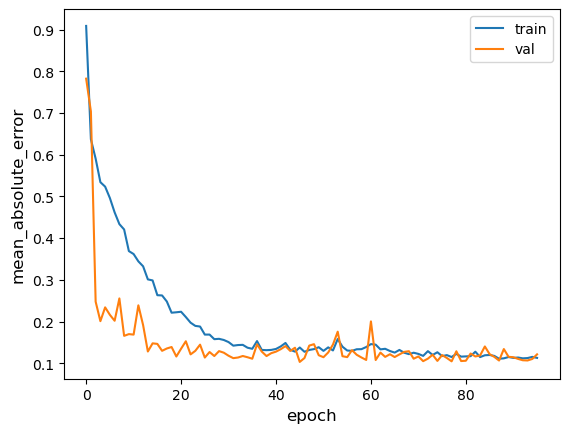

240/240 [==============================] - 1s 2ms/step - loss: 0.0477 - mean_absolute_error: 0.1240
Test accuracy 0.12396834045648575
Test loss 0.04766743630170822


In [257]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [258]:
y_test_pred = multi_dense_model.predict(x_test)

In [259]:
rmse(y_test.values, y_test_pred)

0.2669663228037145

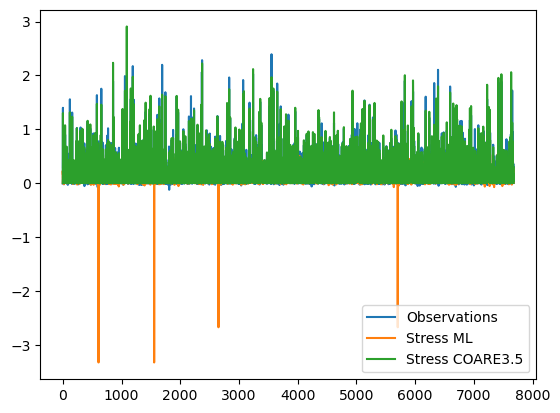

In [260]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

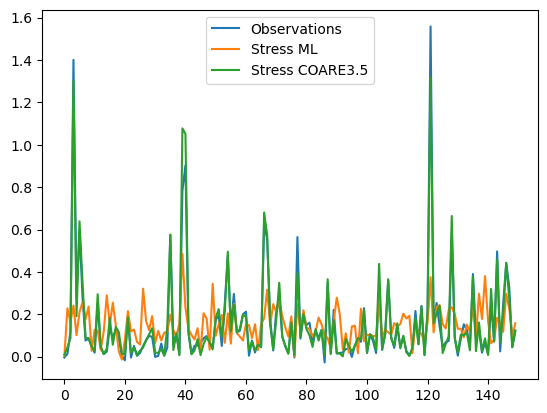

In [261]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [262]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.41755248],
       [0.41755248, 1.        ]])

In [263]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97662186],
       [0.97662186, 1.        ]])

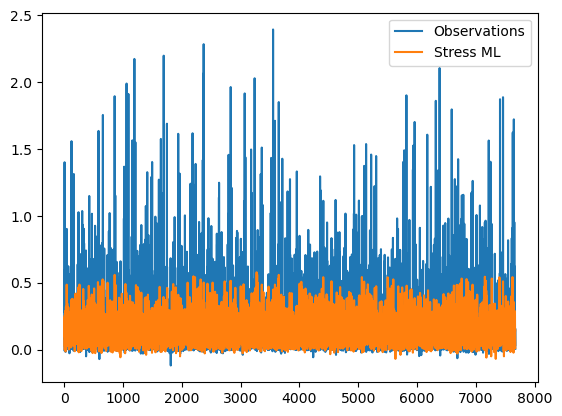

In [268]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [270]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97661787],
       [0.97661787, 1.        ]])

In [271]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.25694472249684497

Text(0, 0.5, 'Stress ML [N/m²]')

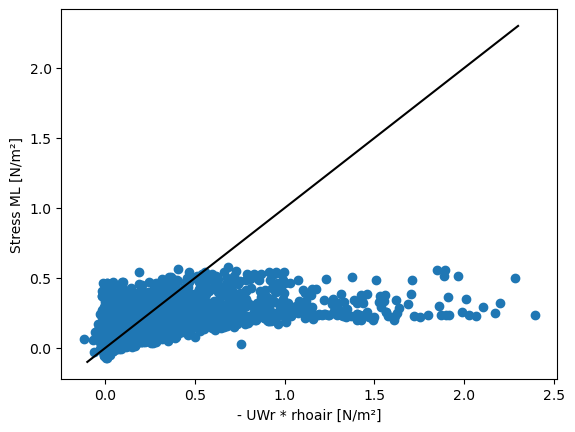

In [272]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [273]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [274]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [275]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
4/4 [==============================] - 1s 75ms/step - loss: 20.2532 - mean_absolute_error: 3.0577 - val_loss: 296.7593 - val_mean_absolute_error: 15.4517
Epoch 2/500
4/4 [==============================] - 0s 40ms/step - loss: 3.1047 - mean_absolute_error: 1.1580 - val_loss: 343.0819 - val_mean_absolute_error: 16.9121
Epoch 3/500
4/4 [==============================] - 0s 37ms/step - loss: 1.4759 - mean_absolute_error: 0.8076 - val_loss: 116.4640 - val_mean_absolute_error: 9.1830
Epoch 4/500
4/4 [==============================] - 0s 34ms/step - loss: 1.5340 - mean_absolute_error: 0.8137 - val_loss: 66.9340 - val_mean_absolute_error: 6.6537
Epoch 5/500
4/4 [==============================] - 0s 34ms/step - loss: 0.8307 - mean_absolute_error: 0.6722 - val_loss: 33.3577 - val_mean_absolute_error: 4.9234
Epoch 6/500
4/4 [==============================] - 0s 37ms/step - loss: 0.6273 - mean_absolute_error: 0.6081 - val_loss: 30.9905 - val_mean_absolute_error: 4.9321
Epoch 7/500
4/4 

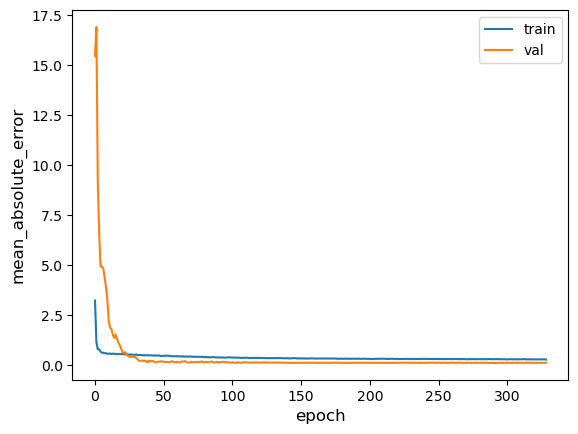

240/240 [==============================] - 1s 2ms/step - loss: 0.0404 - mean_absolute_error: 0.1134
Test accuracy 0.11344685405492783
Test loss 0.04036566987633705


In [276]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [277]:
y_test_pred = multi_dense_model.predict(x_test)

In [278]:
rmse(y_test.values, y_test_pred)

0.27457360434265615

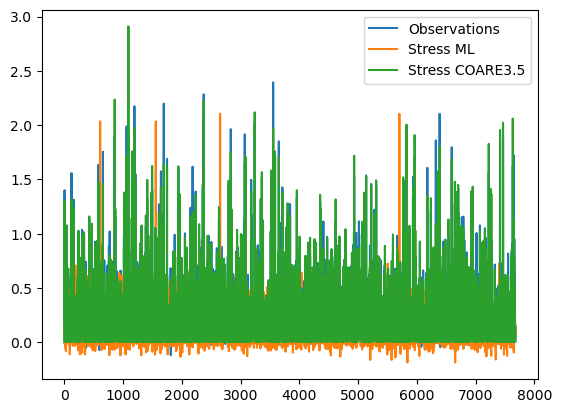

In [279]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

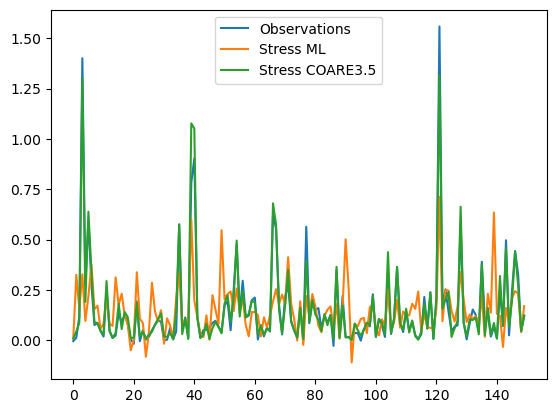

In [280]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [281]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.54267028],
       [0.54267028, 1.        ]])

In [282]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97662186],
       [0.97662186, 1.        ]])

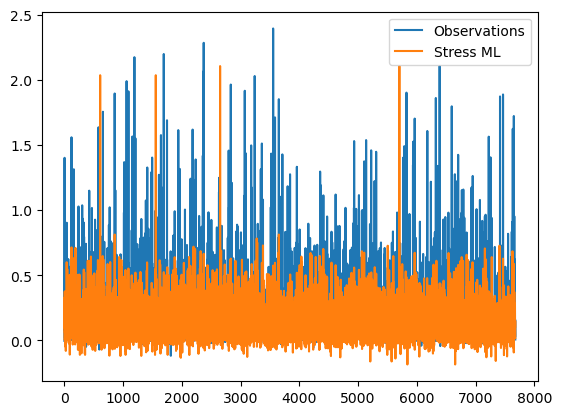

In [283]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [284]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97662186],
       [0.97662186, 1.        ]])

In [285]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.27457360434265615

Text(0, 0.5, 'Stress ML [N/m²]')

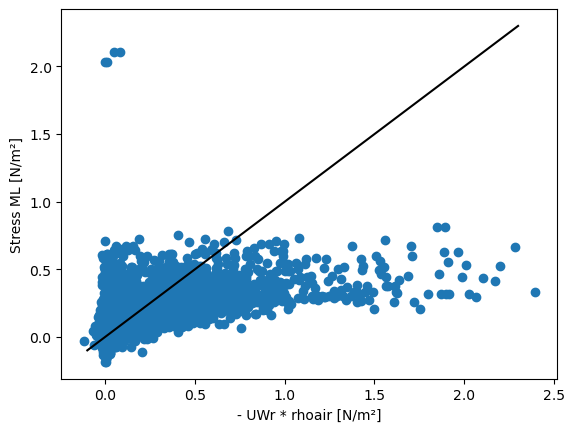

In [286]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [287]:
OUT_STEPS = 1
num_features = 1
batch_size =1024
epochs=500

metric = 'mean_absolute_error'

In [288]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [289]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
2/2 [==============================] - 1s 241ms/step - loss: 15.6727 - mean_absolute_error: 2.7070 - val_loss: 220.5265 - val_mean_absolute_error: 13.5656
Epoch 2/500
2/2 [==============================] - 0s 114ms/step - loss: 13.5035 - mean_absolute_error: 3.2931 - val_loss: 35.6246 - val_mean_absolute_error: 4.2676
Epoch 3/500
2/2 [==============================] - 0s 119ms/step - loss: 1.9561 - mean_absolute_error: 1.1266 - val_loss: 132.2060 - val_mean_absolute_error: 8.4547
Epoch 4/500
2/2 [==============================] - 0s 125ms/step - loss: 1.5245 - mean_absolute_error: 0.9742 - val_loss: 284.9895 - val_mean_absolute_error: 14.5738
Epoch 5/500
2/2 [==============================] - 0s 121ms/step - loss: 0.9913 - mean_absolute_error: 0.8000 - val_loss: 632.3802 - val_mean_absolute_error: 23.2688
Epoch 6/500
2/2 [==============================] - 0s 123ms/step - loss: 0.9472 - mean_absolute_error: 0.7009 - val_loss: 719.6491 - val_mean_absolute_error: 24.5991
Epoch

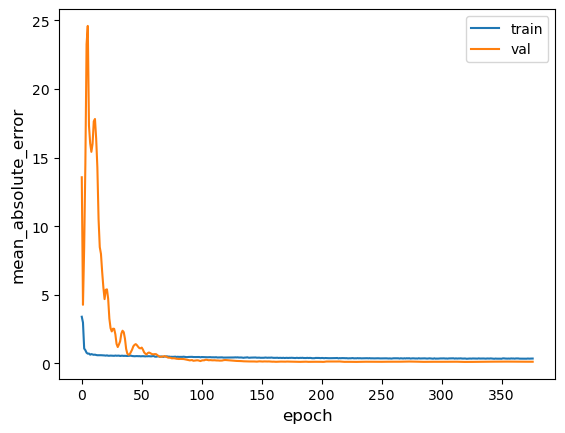

240/240 [==============================] - 2s 7ms/step - loss: 0.0422 - mean_absolute_error: 0.1222
Test accuracy 0.12215393036603928
Test loss 0.04223582148551941


In [290]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [291]:
y_test_pred = multi_dense_model.predict(x_test)

In [292]:
rmse(y_test.values, y_test_pred)

0.2679413452196894

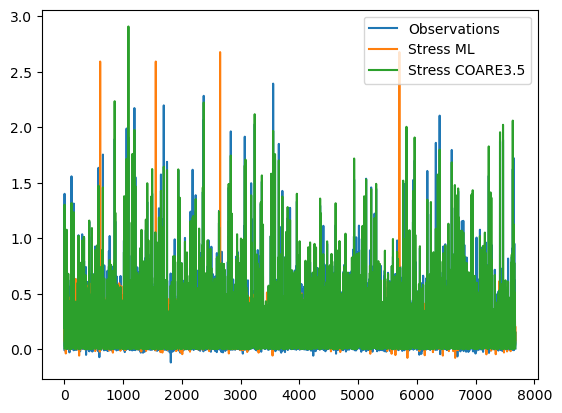

In [293]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

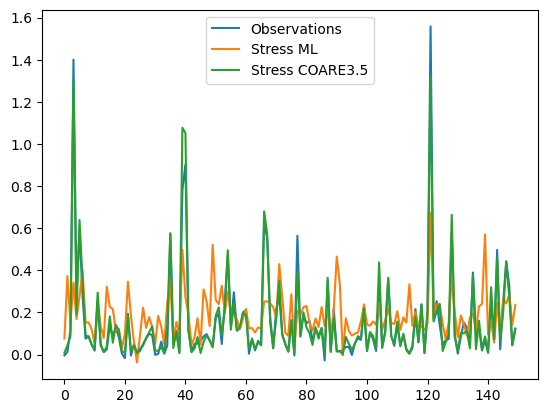

In [294]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [295]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.51404373],
       [0.51404373, 1.        ]])

In [296]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97662186],
       [0.97662186, 1.        ]])

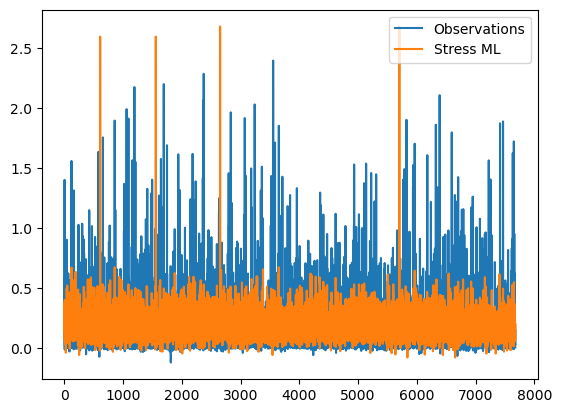

In [297]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [298]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97662186],
       [0.97662186, 1.        ]])

In [299]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.2679413452196894

Text(0, 0.5, 'Stress ML [N/m²]')

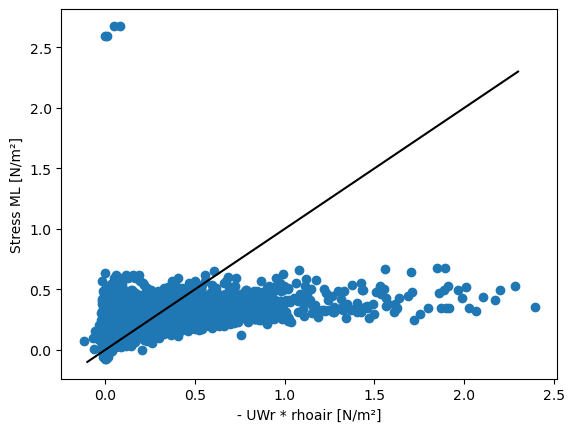

In [300]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [302]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [303]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [304]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 2.2618 - mean_absolute_error: 1.1568 - val_loss: 155.5795 - val_mean_absolute_error: 10.5326
Epoch 2/1000
1/1 [==============================] - 1s 529ms/step - loss: 43.1625 - mean_absolute_error: 5.6247 - val_loss: 1299.2483 - val_mean_absolute_error: 27.4547
Epoch 3/1000
1/1 [==============================] - 1s 531ms/step - loss: 29.3245 - mean_absolute_error: 4.9310 - val_loss: 401.9839 - val_mean_absolute_error: 17.0590
Epoch 4/1000
1/1 [==============================] - 1s 511ms/step - loss: 3.9211 - mean_absolute_error: 1.7067 - val_loss: 469.2927 - val_mean_absolute_error: 18.9879
Epoch 5/1000
1/1 [==============================] - 1s 550ms/step - loss: 2.7237 - mean_absolute_error: 1.4143 - val_loss: 297.4596 - val_mean_absolute_error: 15.0863
Epoch 6/1000
1/1 [==============================] - 1s 548ms/step - loss: 1.9905 - mean_absolute_error: 0.9115 - val_loss: 357.6917 - val_mean_absolute_error: 16.036

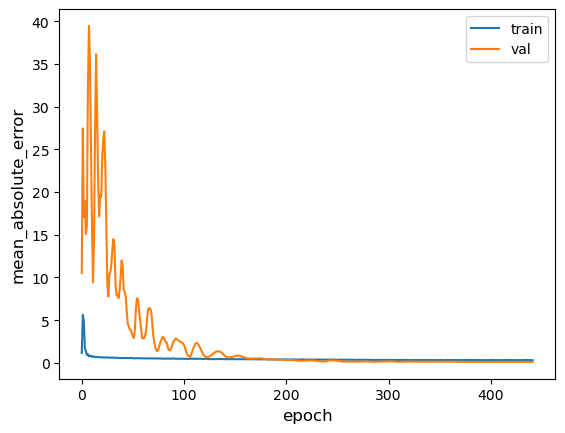

240/240 [==============================] - 6s 25ms/step - loss: 0.0410 - mean_absolute_error: 0.1129
Test accuracy 0.11288036406040192
Test loss 0.04103589430451393


In [305]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [306]:
y_test_pred = multi_dense_model.predict(x_test)

In [307]:
rmse(y_test.values, y_test_pred)

0.2582418032065775

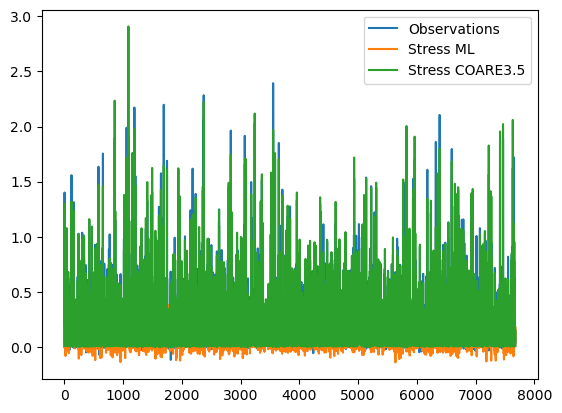

In [308]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

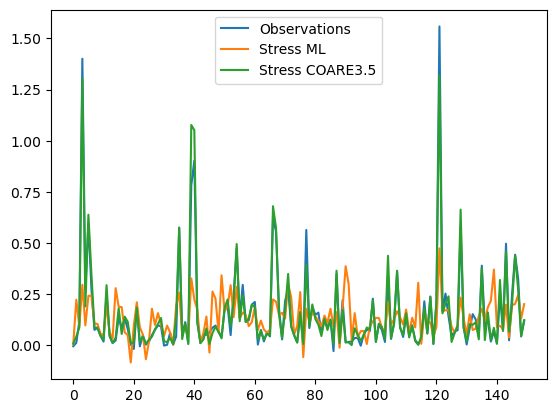

In [309]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [310]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.57365076],
       [0.57365076, 1.        ]])

In [311]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97662186],
       [0.97662186, 1.        ]])

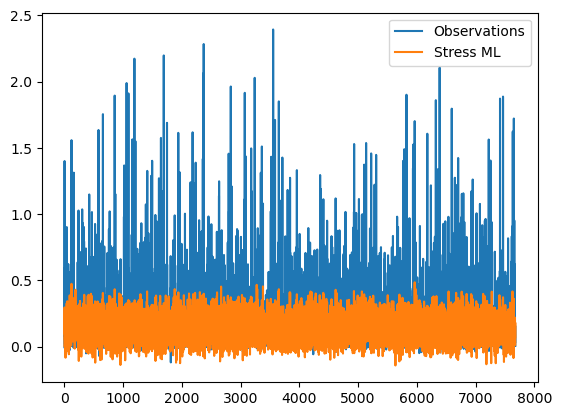

In [312]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [313]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97662186],
       [0.97662186, 1.        ]])

In [314]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.2582418032065775

Text(0, 0.5, 'Stress ML [N/m²]')

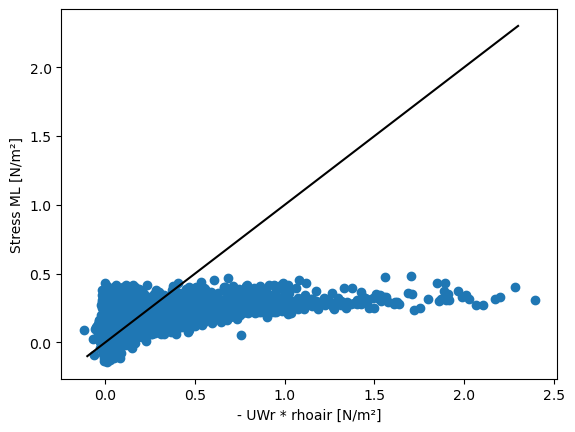

In [315]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [316]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [317]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [318]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 2.1676 - mean_absolute_error: 1.0576 - val_loss: 730.7554 - val_mean_absolute_error: 26.5517
Epoch 2/1000
1/1 [==============================] - 0s 479ms/step - loss: 20.7448 - mean_absolute_error: 3.3715 - val_loss: 1037.2030 - val_mean_absolute_error: 27.8883
Epoch 3/1000
1/1 [==============================] - 0s 498ms/step - loss: 41.6565 - mean_absolute_error: 5.7899 - val_loss: 166.7727 - val_mean_absolute_error: 9.6960
Epoch 4/1000
1/1 [==============================] - 0s 465ms/step - loss: 3.7822 - mean_absolute_error: 1.5624 - val_loss: 1567.3868 - val_mean_absolute_error: 30.0653
Epoch 5/1000
1/1 [==============================] - 0s 456ms/step - loss: 2.7177 - mean_absolute_error: 1.3326 - val_loss: 1637.7083 - val_mean_absolute_error: 33.5269
Epoch 6/1000
1/1 [==============================] - 0s 474ms/step - loss: 1.5329 - mean_absolute_error: 0.8549 - val_loss: 1546.7214 - val_mean_absolute_error: 32.8

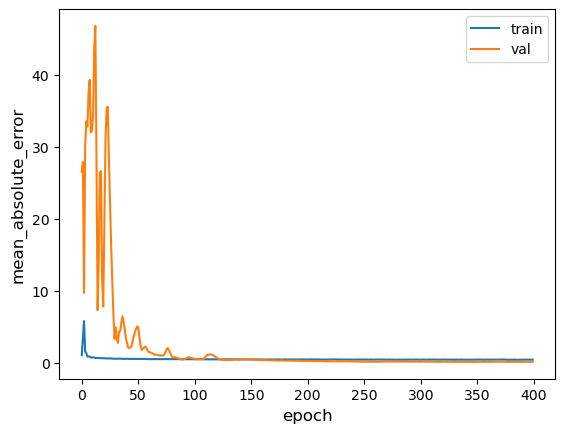

240/240 [==============================] - 6s 26ms/step - loss: 0.0559 - mean_absolute_error: 0.1342
Test accuracy 0.13415774703025818
Test loss 0.05585523322224617


In [319]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [320]:
y_test_pred = multi_dense_model.predict(x_test)

In [321]:
rmse(y_test.values, y_test_pred)

0.269656350952986

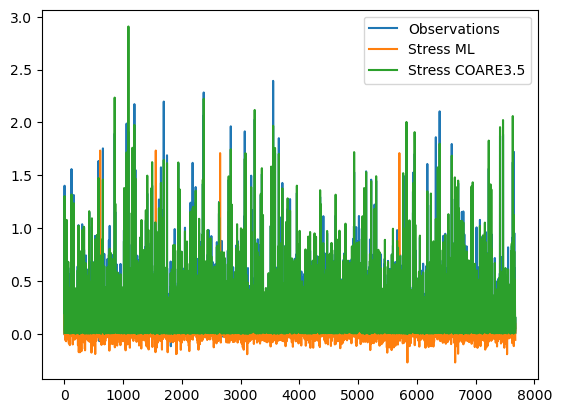

In [322]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

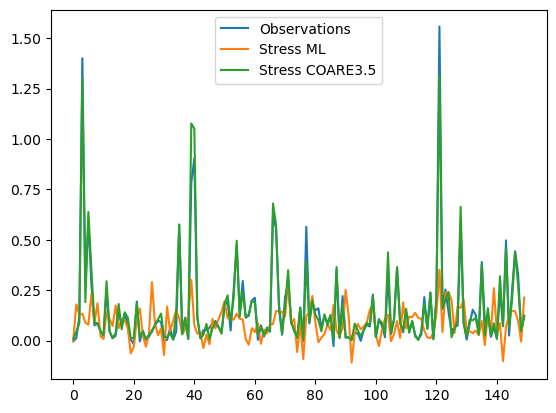

In [323]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [324]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.37485637],
       [0.37485637, 1.        ]])

In [325]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97662186],
       [0.97662186, 1.        ]])

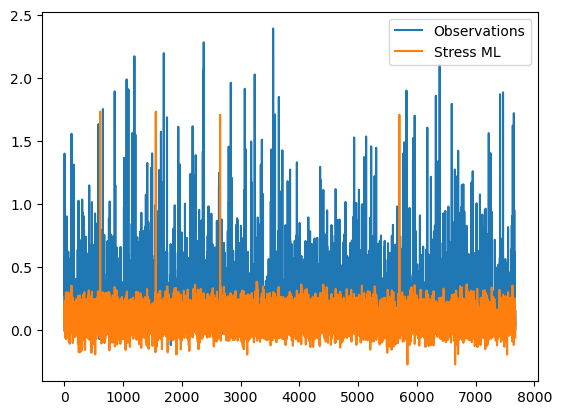

In [326]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [327]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97662186],
       [0.97662186, 1.        ]])

In [328]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.269656350952986

Text(0, 0.5, 'Stress ML [N/m²]')

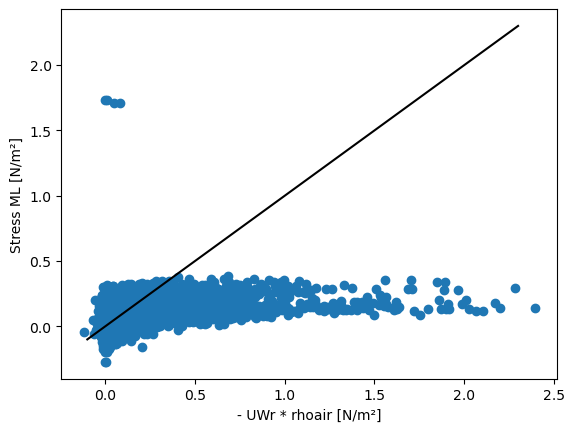

In [329]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [330]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_squared_error'

In [331]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [332]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 2.5126 - mean_absolute_error: 1.2509 - val_loss: 1264.8643 - val_mean_absolute_error: 31.0848
Epoch 2/1000
1/1 [==============================] - 1s 539ms/step - loss: 51.4749 - mean_absolute_error: 6.1559 - val_loss: 1091.3088 - val_mean_absolute_error: 27.7096
Epoch 3/1000
1/1 [==============================] - 1s 542ms/step - loss: 27.4976 - mean_absolute_error: 4.6666 - val_loss: 415.8674 - val_mean_absolute_error: 19.8471
Epoch 4/1000
1/1 [==============================] - 1s 562ms/step - loss: 4.8014 - mean_absolute_error: 1.8742 - val_loss: 80.4277 - val_mean_absolute_error: 8.1812
Epoch 5/1000
1/1 [==============================] - 1s 532ms/step - loss: 1.7647 - mean_absolute_error: 1.0709 - val_loss: 436.1016 - val_mean_absolute_error: 18.2014
Epoch 6/1000
1/1 [==============================] - 1s 522ms/step - loss: 1.1951 - mean_absolute_error: 0.8869 - val_loss: 490.4984 - val_mean_absolute_error: 17.5200

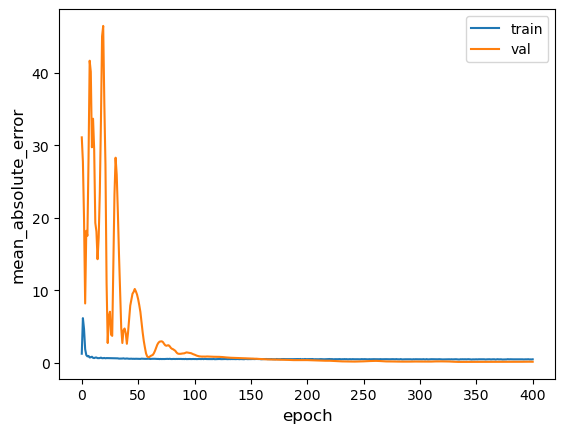

240/240 [==============================] - 6s 25ms/step - loss: 0.0497 - mean_absolute_error: 0.1477
Test accuracy 0.14774465560913086
Test loss 0.0497363917529583


In [333]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [334]:
y_test_pred = multi_dense_model.predict(x_test)

In [335]:
rmse(y_test.values, y_test_pred)

0.24733701133233435

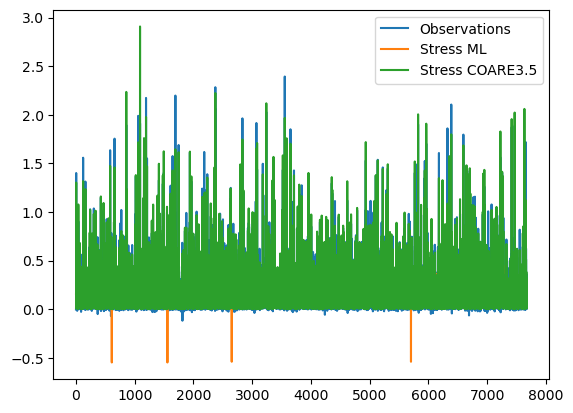

In [336]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

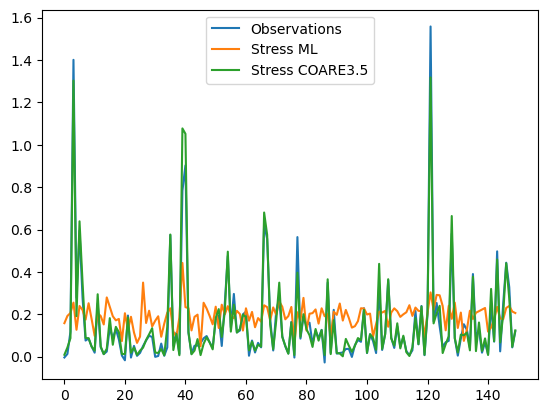

In [337]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [338]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.3773082],
       [0.3773082, 1.       ]])

In [339]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97662186],
       [0.97662186, 1.        ]])

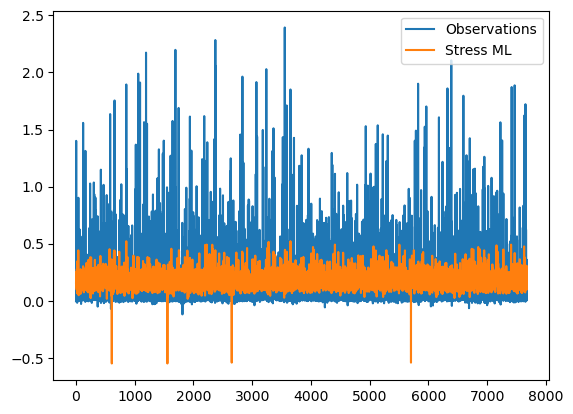

In [340]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [341]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97662186],
       [0.97662186, 1.        ]])

In [342]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.24733701133233435

Text(0, 0.5, 'Stress ML [N/m²]')

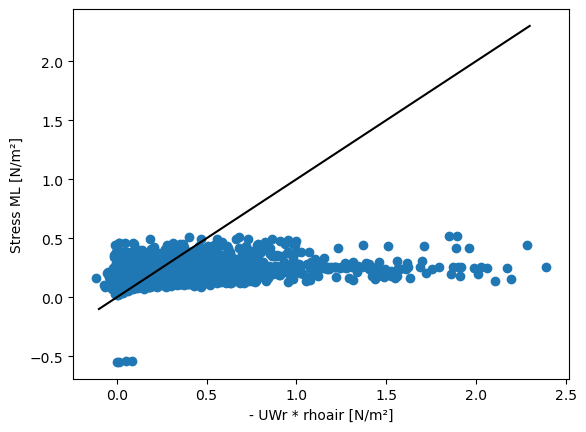

In [343]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 